In [123]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

mpl.rc('font', family='Malgun Gothic')

In [124]:
%matplotlib inline

In [125]:
pd.options.display.max_columns = 100

In [126]:
master_member = pd.read_csv('master_member.csv')

master_product = pd.read_csv('master_product.csv')

log_order = pd.read_csv('log_order.csv')

In [127]:
master_member.columns

Index(['ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일', '유입경로',
       '유입기기', '회원 가입일', '사업자구분', '회원구분'],
      dtype='object')

In [128]:
master_product.columns

Index(['#', '공급사', '과세/면세', '담기', '매입가', '상품명(기본)', '상품코드', '재입고알림', '제조사',
       '카테고리', '판매가', '품절여부', '후기'],
      dtype='object')

In [129]:
log_order.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호'],
      dtype='object')

In [130]:
log_order.rename(columns = {'주문자ID':'ID'},inplace=True)
log_order

,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수량,수령인 주소,주문 시 회원등급,주문경로,주문번호,주문일시,ID,카드사,쿠폰 할인금액,판매가,품목번호
0,무통장입금,44550.0,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,71450,195파이 탕용기 소 300개 1set(2박스),1077.0,13600,1,경상남도 거제시 능포로 168-1 (능포동),전화주문 고객,PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,pp683,NaN,0,71450,42602
1,무통장입금,44000.0,교환안함,0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,141240,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",42.0,19800,2,서울특별시 동대문구 한천로36길 16 (장안동),일반,모바일웹,20181229-0000119,2018-12-29 오후 1:22,asd0908,NaN,0,70620,42930
2,무통장입금,6820.0,교환안함,0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,13910,비닐봉투 배달중 중 백색 200개,1271.0,2900,1,세종특별자치시 호려울로 29 (보람동),NaN,모바일웹,20181230-0000100,2018-12-30 오후 3:15,NaN,NaN,0,13910,42998
3,무통장입금,49500.0,교환안함,0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,81600,195파이 미니탕용기 투톤 300개 1set(2박스),1085.0,12630,1,부산광역시 부산진구 가야대로 482 (개금동),일반,모바일웹,20181231-0000087,2018-12-31 오전 10:30,23533593@n,NaN,0,81600,43063
4,무통장입금,61600.0,교환안함,0,D-20181231-0000108-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,94710,250파이 원형 접시 미니 블랙 400개 1박스,1106.0,18000,1,부산광역시 해운대구 선수촌로 104-21 (반여동),사업자,모바일웹,20181231-0000108,2018-12-31 오전 10:43,romandoll,NaN,0,94710,43066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46744,카드,36300.0,교환안함,0,D-20171229-0000036-00,무료,2017-12-29 오후 4:32,2018-01-02 오전 5:31,0,52800,PP 4칸 도시락용기 A 200개 1박스,445.0,6340,1,서울특별시 서초구 강남대로97길 23 (잠원동),일반,모바일웹,20171229-0000036,2017-12-29 오후 1:39,73987748@n,국민,0,52800,3170
46745,카드,36300.0,교환안함,0,D-20171229-0000043-00,무료,2018-01-03 오전 9:45,2018-01-07 오전 5:38,0,112200,PP 6칸 도시락용기 02 200개 1박스,172.0,13460,2,경기도 의정부시 용민로 483 (민락동),사업자,모바일웹,20171229-0000043,2017-12-29 오후 5:16,chuheesuk,비씨,0,56100,3172
46746,카드,22280.0,교환안함,300,D-20171230-0000022-01,무료,2018-01-02 오후 7:06,2018-01-11 오전 2:46,0,36000,"170mm 수저 투명 1,500개 1박스",140.0,3600,1,대전광역시 서구 관저2동,NaN,네이버 페이,20171230-0000022,2017-12-30 오후 6:56,NaN,기타,0,36000,3177
46747,카드,55000.0,교환안함,320,D-20171231-0000017-01,무료,2018-01-03 오후 2:00,2018-01-06 오후 6:06,0,73460,170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set(2박스),184.0,5140,1,광주광역시 서구 화운로 152 (화정동,NaN,네이버 페이,20171231-0000017,2017-12-31 오전 10:00,NaN,기타,0,73460,3178


In [131]:
df = pd.merge(master_member,log_order, how='inner', on = 'ID')

In [132]:
df.isnull().sum()

ID                0
나이                0
사용가능 적립금          0
성별                0
주소(동/읍/면)       279
최종접속일             0
최종주문일             0
유입경로              0
유입기기              0
회원 가입일            0
사업자구분             0
회원구분              0
결제수단              0
공급원가             46
교환구분              0
네이버 포인트           0
배송번호              0
배송비 정보            0
배송시작일             0
배송완료일             0
사용한 적립금액          0
상품구매금액            0
상품명              46
상품번호             46
상품별 추가할인금액        0
수량                0
수령인 주소            0
주문 시 회원등급         0
주문경로              0
주문번호              0
주문일시              0
카드사           29046
쿠폰 할인금액           0
판매가               0
품목번호              0
dtype: int64

In [133]:
def func1(row):
        if '무통장' in row:
                return '무통장입금'
        elif '카드' in row:
                return '카드'
        elif '실시간계좌이체' in row:
                return '실시간계좌이체'
        elif '휴대폰' in row:
                return '휴대폰'
        elif '가상계좌' in row:
                return '가상계좌'
        elif '카카오머니' in row:
                return '카카오머니'
        else:
                return '기타'



df['결제수단_cut'] = df['결제수단'].apply(func1)

In [134]:
df[df['결제수단_cut'] == '무통장입금']['카드사'].value_counts()

삼성               28
롯데               23
신한(구.LG카드 포함)    14
현대               12
NH (농협)          11
국민               10
비씨                8
외환                6
하나SK              3
Name: 카드사, dtype: int64

In [135]:
df[df['카드사'].isna()]['결제수단_cut'].value_counts()

무통장입금      28245
휴대폰          448
가상계좌         160
실시간계좌이체      120
기타            50
카카오머니         23
Name: 결제수단_cut, dtype: int64

In [136]:
df['카드사'] = df['카드사'].fillna('카드아님')

In [137]:
df[df['주소(동/읍/면)'].isna()]['주소(동/읍/면)']

770      NaN
20291    NaN
20292    NaN
20313    NaN
20314    NaN
        ... 
43511    NaN
43518    NaN
43519    NaN
43520    NaN
43521    NaN
Name: 주소(동/읍/면), Length: 279, dtype: object

In [138]:
df['주소(동/읍/면)'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
43520     True
43521     True
43522    False
43523    False
43524    False
Name: 주소(동/읍/면), Length: 43525, dtype: bool

In [139]:
def func2(row):
        if row == np.NaN:
            row = df['수령인 주소']
                

In [140]:
df['주소'] = df['주소(동/읍/면)'].fillna(0)
df['주소']

for i in df['주소']:
    if i == 0 :
         df['주소'] = df['수령인 주소']
    else:
        continue

In [141]:
df = df.drop('주소(동/읍/면)', axis =1)

In [142]:
df = df.dropna()

In [143]:
df['주소']

0        전라북도 전주시 덕진구 동부대로 879 (호성동1가)
1           전라북도 전주시 완산구 효자동3가 1676-13
2           전라북도 전주시 완산구 효자동3가 1676-13
3           전라북도 전주시 완산구 효자동3가 1676-13
4             경기도 부천시 원미구 상일로 126 (상동)
                     ...              
43520        충청남도 공주시 한적2길 64-13 (금흥동)
43521            대전광역시 서구 도솔로 41 (도마동)
43522       경기도 의정부시 동일로454번길 40 (신곡동)
43523      경상남도 창원시 의창구 북면 무동로267번길 10
43524      경상남도 창원시 의창구 북면 무동로267번길 10
Name: 주소, Length: 43479, dtype: object

In [144]:
# def func3(row):
#         row = row.split('(')[0]
#         row = row.split(' ')[0]
#         return row
    
# df['주소'].apply(func3).value_counts()

In [145]:
def func3(row):
        row = row.split(' ')[0]
        return row
    
df['시도'] = df['수령인 주소'].apply(func3)

In [146]:
df.columns

Index(['ID', '나이', '사용가능 적립금', '성별', '최종접속일', '최종주문일', '유입경로', '유입기기',
       '회원 가입일', '사업자구분', '회원구분', '결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호',
       '배송비 정보', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액', '상품명', '상품번호',
       '상품별 추가할인금액', '수량', '수령인 주소', '주문 시 회원등급', '주문경로', '주문번호', '주문일시',
       '카드사', '쿠폰 할인금액', '판매가', '품목번호', '결제수단_cut', '주소', '시도'],
      dtype='object')

In [147]:
def func5(row):
        row = row.split(' ')[0]
        return row

In [148]:
df['주문일시_dt'] = pd.to_datetime(df['주문일시'].apply(func5))
df['주문일시_dt']

df['주문일시_년'] = df['주문일시_dt'].dt.year
df['주문일시_월'] = df['주문일시_dt'].dt.month
df['주문일시_일'] = df['주문일시_dt'].dt.day
df['주문일시_분기'] = df['주문일시_dt'].dt.quarter

In [149]:
df['주문일시'].isnull().sum()

0

In [150]:
df.pivot_table(index='주문일시', values='판매가', aggfunc='sum')

,판매가
주문일시,
2017-01-01 오후 3:38,66500
2017-01-15 오전 1:24,17000
2017-01-18 오후 4:41,73700
2017-01-23 오전 12:35,17000
2017-02-02 오후 1:39,72000
...,...
2019-05-31 오후 6:32,138670
2019-06-02 오후 7:34,222370
2019-06-04 오후 12:29,61900


In [151]:
def func(row):
        if row<30:
                return '20대'
        elif 30<=row<40:
                return '30대'
        elif 40<=row<50:
                return '40대'
        elif 50<=row<60:
                return '50대'
        elif 60<=row<70:
                return '60대'
        elif 70<=row<80:
                return '70대'
        elif 80<=row<90:
                return '80대'
        elif 90<=row:
                return '90대'

df['연령대'] = df['나이'].apply(func)

In [152]:
df_y_sale = df.pivot_table(index='시도', values='판매가',columns='주문일시_년', aggfunc='sum')
df_y_sale
# (df_y_sale[2018] - df_y_sale[2017]) /df_y_sale[2017]
# (df_y_sale[2019] - df_y_sale[2018]) /df_y_sale[2018]

주문일시_년,2017,2018,2019
시도,,,
강원도,1237440,64073320,48124410
경기도,10289830,216190760,211017430
경상남도,3805260,142639350,120071280
경상북도,2175150,86265570,76304750
광주광역시,509110,45681510,28329390
대구광역시,4219130,71317300,49895880
대전광역시,7845150,54022240,35563450
부산광역시,7741540,150103210,130895770
서울특별시,12528520,134593100,150621970


In [153]:
df_y_sale = df_y_sale.drop(columns=2017)
df_y_sale['증감율'] = (df_y_sale[2019] - df_y_sale[2018]) /df_y_sale[2018]
df_y_sale.to_excel('시도별판매증감율.xlsx')

In [154]:
df.pivot_table(index='연령대', values='판매가',columns='주문일시_년', aggfunc='sum')

주문일시_년,2017,2018,2019
연령대,,,
20대,5221680.0,210459460.0,216739590.0
30대,16220630.0,295950390.0,229512900.0
40대,30985480.0,697547860.0,620135650.0
50대,8764410.0,76008660.0,26329350.0
60대,2171310.0,17983670.0,7653450.0
70대,359000.0,24214990.0,7765940.0
80대,NaN,736360.0,1060830.0
90대,NaN,324750.0,236240.0


In [155]:
df.columns

Index(['ID', '나이', '사용가능 적립금', '성별', '최종접속일', '최종주문일', '유입경로', '유입기기',
       '회원 가입일', '사업자구분', '회원구분', '결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호',
       '배송비 정보', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액', '상품명', '상품번호',
       '상품별 추가할인금액', '수량', '수령인 주소', '주문 시 회원등급', '주문경로', '주문번호', '주문일시',
       '카드사', '쿠폰 할인금액', '판매가', '품목번호', '결제수단_cut', '주소', '시도', '주문일시_dt',
       '주문일시_년', '주문일시_월', '주문일시_일', '주문일시_분기', '연령대'],
      dtype='object')

In [156]:
df.pivot_table(index='유입기기', values='판매가',columns='주문일시_년', aggfunc='sum')

주문일시_년,2017,2018,2019
유입기기,,,
PC,38379770,869076830,675494440
모바일,25342740,454149310,433939510


In [157]:
df_20 = df.loc[df['연령대']=='20대']
df_30 = df.loc[df['연령대']=='30대']
# df_20 = df.loc[df['연령대'].isin(['20대','30대'])]

In [158]:
df_20_c = df_20.pivot_table(index='유입기기', values='판매가',columns='주문일시_년', aggfunc='sum')
df_20_c2 = df_20_c.reset_index()
df_20_c2.to_excel('20,30대유입기기별사용.xlsx')
df_20_c2

주문일시_년,유입기기,2017,2018,2019
0,PC,3649830,150689890,143681710
1,모바일,1571850,59769570,73057880


In [159]:
df_30_c = df_30.pivot_table(index='유입기기', values='판매가',columns='주문일시_년', aggfunc='sum')
df_30_c2 = df_30_c.reset_index()
df_30_c2.to_excel('30대유입기기별사용.xlsx')
df_30_c2

주문일시_년,유입기기,2017,2018,2019
0,PC,11245330,227757720,166333200
1,모바일,4975300,68192670,63179700


In [160]:
df_20.pivot_table(index='유입기기', values='수량',columns='주문일시_년', aggfunc='sum')

주문일시_년,2017,2018,2019
유입기기,,,
PC,72,3533,2604
모바일,47,1346,1442


In [161]:
df_30.pivot_table(index='유입기기', values='수량',columns='주문일시_년', aggfunc='sum')

주문일시_년,2017,2018,2019
유입기기,,,
PC,248,4973,3117
모바일,129,1576,1089


In [162]:
1576+1346

2922

Text(0.5, 1.0, '년도별 20대 모바일 주문')

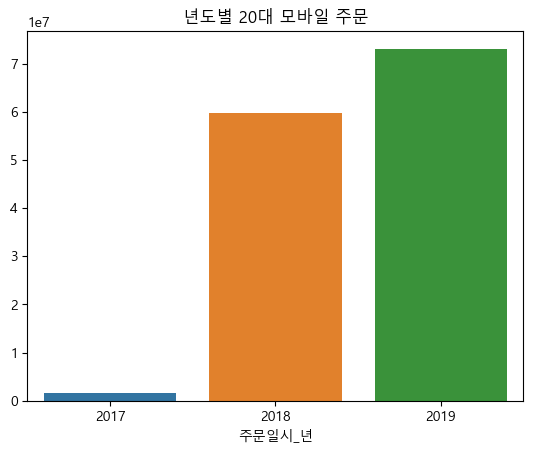

In [163]:
p1 = df_20_c2[df_20_c2['유입기기']=='모바일']

sns.barplot(data=p1)
plt.title('년도별 20대 모바일 주문')
# stats.normaltest(df_20_c2[df_20_c2['유입기기']=='모바일'])

In [164]:
# '연령대'와 '유입기기'의 연관성이 있는지 가설검정을 수행

df1_table = pd.crosstab(df[df['연령대'].isin(['20대','30대'])]['연령대'], df[df['연령대'].isin(['20대','30대'])]['유입기기'])
stats.chi2_contingency(df1_table)
# 통계량 / P.value / 자유도 / 기댓값
# P.value < 0.05 대립가설 참 / 고객의 '연령대'와 '유입기기' 간의 연관성이 있다.

(39.96297445207209,
 2.58822665372825e-10,
 1,
 array([[5565.36424225, 2138.63575775],
        [6899.63575775, 2651.36424225]]))

In [165]:
df.pivot_table(index='유입기기', values='판매가', aggfunc='sum')

,판매가
유입기기,
PC,1582951040
모바일,913431560


In [166]:
df_age = df.pivot_table(index='유입기기', values='판매가',columns='연령대', aggfunc='sum')
df_age['총합'] = df.pivot_table(index='유입기기', values='판매가', aggfunc='sum')
df_age
age_list=['20대','30대','40대','50대','60대','70대','80대','90대']

In [167]:
for i in age_list :
    df_age[i] = df_age[i]/df_age['총합']*100

In [168]:
df_age

연령대,20대,30대,40대,50대,60대,70대,80대,90대,총합
유입기기,,,,,,,,,
PC,18.826952,25.606367,47.555719,4.791244,1.320070,1.793105,0.097395,0.009148,1582951040
모바일,14.713669,14.926972,65.235894,3.860101,0.756747,0.433087,0.027968,0.045562,913431560


In [169]:
#     - '판매가'의 정규성을 확인
#     - '20대'과 '30대' 집단의 '판매가'의 평균의 차이가 있는지 가설검정을 수행하십시오.
cond1 = df['연령대'] == '20대'
cond2 = df['연령대'] == '30대'

stats.normaltest(df[df['연령대'].isin(['20대','30대'])]['판매가'])
# p.value < 0.05 / 대립가설 참 / 분포가 정규분포를 따르지 않는다.

NormaltestResult(statistic=8200.90501191791, pvalue=0.0)

In [170]:
stats.ranksums(df.loc[df['연령대'].isin(['20대','30대'])]['판매가'], df.loc[~(df['연령대'].isin(['20대','30대']))]['판매가'])
# P.value < 0.05 / 대립가설 참 / 두 집단의 판매가 값의 평균의 차이가 있다.

RanksumsResult(statistic=-4.1193323288158155, pvalue=3.799717996933387e-05)

In [171]:
df.head(2)

,ID,나이,사용가능 적립금,성별,최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수량,수령인 주소,주문 시 회원등급,주문경로,주문번호,주문일시,카드사,쿠폰 할인금액,판매가,품목번호,결제수단_cut,주소,시도,주문일시_dt,주문일시_년,주문일시_월,주문일시_일,주문일시_분기,연령대
0,cgh1385,53,0,남자,2017-01-02 오후 12:32,2017-01-01 오후 3:38,블로그광고,모바일,2017-01-01,개인,일반,무통장입금,51700.0,교환안함,0,D-20170101-0000015-00,선불,2017-01-17 오전 8:26,2017-01-17 오전 8:26,0,66500,"105파이 다용도컵 세트 5호 대 370ml 백색 PS 1,000개 1set(2박스)",45.0,0,1,전라북도 전주시 덕진구 동부대로 879 (호성동1가),일반,모바일웹,20170101-0000015,2017-01-01 오후 3:38,카드아님,0,66500,4,무통장입금,전라북도 전주시 덕진구 동부대로 879 (호성동1가),전라북도,2017-01-01,2017,1,1,1,50대
1,pjkl77,28,0,남자,2017-02-26 오후 10:52,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,사업자,사업자,"쿠폰,카드",6200.0,교환안함,0,D-20170115-0000013-00,선불,2017-01-19 오전 8:56,2017-01-19 오후 7:51,0,17000,소량 105파이 다용도컵 세트 5호 대 370ml 투명 PS 100개,67.0,0,1,전라북도 전주시 완산구 효자동3가 1676-13,일반,PC쇼핑몰,20170115-0000013,2017-01-15 오전 1:24,NH (농협),5000,17000,9,카드,전라북도 전주시 완산구 효자동3가 1676-13,전라북도,2017-01-15,2017,1,15,1,20대


# 전체 df

In [172]:
# 판매가, 성별, 유입경로, 유입기기, 사업자구분, 회원구분
df.columns

Index(['ID', '나이', '사용가능 적립금', '성별', '최종접속일', '최종주문일', '유입경로', '유입기기',
       '회원 가입일', '사업자구분', '회원구분', '결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호',
       '배송비 정보', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액', '상품명', '상품번호',
       '상품별 추가할인금액', '수량', '수령인 주소', '주문 시 회원등급', '주문경로', '주문번호', '주문일시',
       '카드사', '쿠폰 할인금액', '판매가', '품목번호', '결제수단_cut', '주소', '시도', '주문일시_dt',
       '주문일시_년', '주문일시_월', '주문일시_일', '주문일시_분기', '연령대'],
      dtype='object')

In [173]:
df['주문일시_월'].value_counts()

5     5474
4     4943
3     4183
12    4136
11    3998
1     3888
10    3646
2     3308
8     3029
7     2608
9     2333
6     1933
Name: 주문일시_월, dtype: int64

In [174]:
stats.normaltest(df['판매가'])
# p.value < 0.05 / 대립가설 참 / 분포가 정규분포를 따르지 않는다.

NormaltestResult(statistic=21870.201788507504, pvalue=0.0)

In [175]:
stats.normaltest(df['나이'])
# p.value < 0.05 / 대립가설 참 / 분포가 정규분포를 따르지 않는다.

NormaltestResult(statistic=5793.735625645794, pvalue=0.0)

In [176]:
# '연령대'와 '유입경로'의 연관성이 있는지 가설검정을 수행

df_table = pd.crosstab(df['연령대'], df['유입경로'])
stats.chi2_contingency(df_table)
# 통계량 / P.value / 자유도 / 기댓값
# P.value < 0.05 대립가설 참 / 연령대와 유입경로 간의 연관성이 있다.


(35766.59545725008,
 0.0,
 77,
 array([[9.41227903e+02, 4.11787208e+02, 6.52587042e+02, 9.46189195e+01,
         7.76973711e+02, 9.51504864e+02, 4.53780998e+02, 8.12588698e+02,
         7.53053198e+02, 7.90440075e+02, 6.31501552e+02, 4.33935831e+02],
        [1.16688314e+03, 5.10511373e+02, 8.09041905e+02, 1.17303388e+02,
         9.63249730e+02, 1.17962396e+03, 5.62572989e+02, 1.00740325e+03,
         9.33594379e+02, 9.79944594e+02, 7.82901263e+02, 5.37970032e+02],
        [2.87169806e+03, 1.25636790e+03, 1.99105120e+03, 2.88683502e+02,
         2.37055648e+03, 2.90305320e+03, 1.38449148e+03, 2.47921824e+03,
         2.29757469e+03, 2.41164252e+03, 1.92671911e+03, 1.32394363e+03],
        [2.17836105e+02, 9.53032958e+01, 1.51033579e+02, 2.18984337e+01,
         1.79821408e+02, 2.20214586e+02, 1.05022264e+02, 1.88064077e+02,
         1.74285287e+02, 1.82938039e+02, 1.46153591e+02, 1.00429334e+02],
        [5.30234826e+01, 2.31977736e+01, 3.67630810e+01, 5.33029738e+00,
         4.37703

In [177]:
# '연령대'와 '유입기기'의 연관성이 있는지 가설검정을 수행

df_table = pd.crosstab(df['연령대'], df['유입기기'])
stats.chi2_contingency(df_table)
# 통계량 / P.value / 자유도 / 기댓값
# P.value < 0.05 대립가설 참 / 연령대와 유입기기 간의 연관성이 있다.


(1312.7265287342816,
 2.9376186371206453e-279,
 7,
 array([[4.91947506e+03, 2.78452494e+03],
        [6.09889749e+03, 3.45210251e+03],
        [1.50093797e+04, 8.49562030e+03],
        [1.13855452e+03, 6.44445479e+02],
        [2.77135537e+02, 1.56864463e+02],
        [2.97569493e+02, 1.68430507e+02],
        [1.66025898e+01, 9.39741024e+00],
        [6.38561144e+00, 3.61438856e+00]]))

In [178]:
# '시도'와 '주문경로'의 연관성이 있는지 가설검정을 수행

df_table = pd.crosstab(df['시도'], df['주문경로'])
stats.chi2_contingency(df_table)
# 통계량 / P.value / 자유도 / 기댓값
# P.value < 0.05 대립가설 참 / 시도와 주문경로 간의 연관성이 있다.


(480.4620206292681,
 4.40309599695775e-92,
 16,
 array([[1204.294303  ,  867.705697  ],
        [4399.8590124 , 3170.1409876 ],
        [2696.29405   , 1942.70595   ],
        [1665.78545965, 1200.21454035],
        [ 760.82106304,  548.17893696],
        [1290.89654776,  930.10345224],
        [ 997.37887256,  718.62112744],
        [2928.78329768, 2110.21670232],
        [2916.57761218, 2101.42238782],
        [ 191.22240622,  137.77759378],
        [ 850.91064652,  613.08935348],
        [1038.0644909 ,  747.9355091 ],
        [ 811.38747441,  584.61252559],
        [ 990.40419513,  713.59580487],
        [ 288.28666713,  207.71333287],
        [1153.72789163,  831.27210837],
        [1086.3060098 ,  782.6939902 ]]))

In [179]:
# '시도'와 '유입기기'의 연관성이 있는지 가설검정을 수행

df_table = pd.crosstab(df['시도'], df['유입기기'])
stats.chi2_contingency(df_table)
# 통계량 / P.value / 자유도 / 기댓값
# P.value < 0.05 대립가설 참 / 시도와 유입기기 간의 연관성이 있다.


(676.9787383216681,
 1.021803581629471e-133,
 16,
 array([[1323.09869132,  748.90130868],
        [4833.90786357, 2736.09213643],
        [2962.28514915, 1676.71485085],
        [1830.11624002, 1035.88375998],
        [ 835.8765381 ,  473.1234619 ],
        [1418.24430185,  802.75569815],
        [1095.77092389,  620.22907611],
        [3217.70960694, 1821.29039306],
        [3204.2998229 , 1813.7001771 ],
        [ 210.08661653,  118.91338347],
        [ 934.85351549,  529.14648451],
        [1140.47020401,  645.52979599],
        [ 891.43135767,  504.56864233],
        [1088.10819016,  615.89180984],
        [ 316.72632765,  179.27367235],
        [1267.54387175,  717.45612825],
        [1193.470779  ,  675.529221  ]]))

In [180]:
# '연령대'와 '사업자구분'의 연관성이 있는지 가설검정을 수행

df_table = pd.crosstab(df['연령대'], df['사업자구분'])
stats.chi2_contingency(df_table)
# 통계량 / P.value / 자유도 / 기댓값
# P.value < 0.05 대립가설 참 / 연령대와 유입기기 간의 연관성이 있다.


(1027.7516669341908,
 1.7356749453276813e-210,
 14,
 array([[3.99029600e+03, 3.71334962e+03, 3.54377976e-01],
        [4.94695186e+03, 4.60360880e+03, 4.39338531e-01],
        [1.21744428e+04, 1.13294760e+04, 1.08121162e+00],
        [9.23506980e+02, 8.59411003e+02, 8.20166057e-02],
        [2.24790819e+02, 2.09189218e+02, 1.99636606e-02],
        [2.41365257e+02, 2.24613308e+02, 2.14356356e-02],
        [1.34667311e+01, 1.25320730e+01, 1.19597967e-03],
        [5.17951195e+00, 4.82002806e+00, 4.59992180e-04]]))

In [181]:
df['주문일시_월'].dtype

dtype('int64')

In [182]:
# 1~5월까지만 추출
df2 = df.loc[df['주문일시_월'].isin([1,2,3,4,5])]
df2['주문일시_월'].value_counts()

5    5474
4    4943
3    4183
1    3888
2    3308
Name: 주문일시_월, dtype: int64

In [183]:
stats.normaltest(df2['판매가'])
# p.value < 0.05 / 대립가설 참 / 분포가 정규분포를 따르지 않는다.

NormaltestResult(statistic=18333.126653547115, pvalue=0.0)

In [184]:
stats.normaltest(df2['나이'])
# p.value < 0.05 / 대립가설 참 / 분포가 정규분포를 따르지 않는다.

NormaltestResult(statistic=2632.3566380437233, pvalue=0.0)

In [185]:
cond0 = df2['연령대'].isin(['20대','30대'])

stats.ranksums(df2[cond0]['판매가'],df2[~cond0]['판매가'])
# P.value > 0.05 / 귀무가설 참 / 두 집단의 값의 평균의 차이가 없다.

RanksumsResult(statistic=-1.783703707544104, pvalue=0.07447182338374816)

## 2017년도 별 매출

In [186]:
# 2017년도 매출로
df17 = df2[df2['주문일시_년']==2017]
df17

,ID,나이,사용가능 적립금,성별,최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수량,수령인 주소,주문 시 회원등급,주문경로,주문번호,주문일시,카드사,쿠폰 할인금액,판매가,품목번호,결제수단_cut,주소,시도,주문일시_dt,주문일시_년,주문일시_월,주문일시_일,주문일시_분기,연령대
0,cgh1385,53,0,남자,2017-01-02 오후 12:32,2017-01-01 오후 3:38,블로그광고,모바일,2017-01-01,개인,일반,무통장입금,51700.0,교환안함,0,D-20170101-0000015-00,선불,2017-01-17 오전 8:26,2017-01-17 오전 8:26,0,66500,"105파이 다용도컵 세트 5호 대 370ml 백색 PS 1,000개 1set(2박스)",45.0,0,1,전라북도 전주시 덕진구 동부대로 879 (호성동1가),일반,모바일웹,20170101-0000015,2017-01-01 오후 3:38,카드아님,0,66500,4,무통장입금,전라북도 전주시 덕진구 동부대로 879 (호성동1가),전라북도,2017-01-01,2017,1,1,1,50대
1,pjkl77,28,0,남자,2017-02-26 오후 10:52,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,사업자,사업자,"쿠폰,카드",6200.0,교환안함,0,D-20170115-0000013-00,선불,2017-01-19 오전 8:56,2017-01-19 오후 7:51,0,17000,소량 105파이 다용도컵 세트 5호 대 370ml 투명 PS 100개,67.0,0,1,전라북도 전주시 완산구 효자동3가 1676-13,일반,PC쇼핑몰,20170115-0000013,2017-01-15 오전 1:24,NH (농협),5000,17000,9,카드,전라북도 전주시 완산구 효자동3가 1676-13,전라북도,2017-01-15,2017,1,15,1,20대
2,pjkl77,28,0,남자,2017-02-26 오후 10:52,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,사업자,사업자,"쿠폰,카드",6200.0,교환안함,0,D-20170123-0000021-00,선불,2017-01-23 오후 3:26,2017-01-24 오후 6:00,0,17000,소량 105파이 다용도컵 세트 5호 대 370ml 투명 PS 100개,67.0,0,1,전라북도 전주시 완산구 효자동3가 1676-13,사업자,PC쇼핑몰,20170123-0000021,2017-01-23 오전 12:35,NH (농협),3000,17000,19,카드,전라북도 전주시 완산구 효자동3가 1676-13,전라북도,2017-01-23,2017,1,23,1,20대
3,pjkl77,28,0,남자,2017-02-26 오후 10:52,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,사업자,사업자,페이나우(카드),6200.0,교환안함,0,D-20170226-0000015-00,선불,2017-02-27 오후 3:26,2017-03-01 오전 9:45,0,17000,소량 105파이 다용도컵 세트 5호 대 370ml 투명 PS 100개,67.0,0,1,전라북도 전주시 완산구 효자동3가 1676-13,사업자,PC쇼핑몰,20170226-0000015,2017-02-26 오후 10:55,NH (농협),0,17000,67,카드,전라북도 전주시 완산구 효자동3가 1676-13,전라북도,2017-02-26,2017,2,26,1,20대
40,bear011,40,21908,남자,2018-12-19 오후 1:26,2018-12-19 오후 1:29,SNS광고,모바일,2017-01-17,사업자,사업자,무통장입금,69300.0,교환안함,0,D-20170327-0000028-00,착불,2017-03-27 오후 5:06,2017-03-27 오후 5:06,0,84600,"300파이 원형 찜용기 왕대 투명 4,500ml 100개 1set(2박스)",86.0,0,1,경기도 부천시 원미구 상일로 126 (상동),사업자,PC쇼핑몰,20170327-0000028,2017-03-27 오전 9:19,카드아님,0,84600,137,무통장입금,경기도 부천시 원미구 상일로 126 (상동),경기도,2017-03-27,2017,3,27,1,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,byulsina,47,0,여자,2017-05-30 오후 4:23,2017-05-30 오후 4:36,SNS광고,모바일,2017-05-30,개인,일반,"쿠폰,휴대폰",6750.0,교환안함,0,D-20170530-0000111-00,무료,2017-06-02 오전 11:54,2017-06-08 오전 5:40,0,13500,170파이 샐러드 3칸 (150ml x 3)/검정/50개,185.0,0,1,서울특별시 구로구 공원로8길 36 (구로동),일반,모바일웹,20170530-0000111,2017-05-30 오후 4:36,카드아님,2000,13500,473,휴대폰,서울특별시 구로구 공원로8길 36 (구로동),서울특별시,2017-05-30,2017,5,30,2,40대
713,byulsina,47,0,여자,2017-05-30 오후 4:23,2017-05-30 오후 4:36,SNS광고,모바일,2017-05-30,개인,일반,"쿠폰,휴대폰",6750.0,교환안함,0,D-20170530-0000111-01,무료,2017-06-02 오전 11:54,2017-06-08 오전 5:40,0,13500,170파이 샐러드 2칸 (250ml x 2)/검정/50개,181.0,0,1,서울특별시 구로구 공원로8길 36 (구로동),일반,모바일웹,20170530-0000111,2017-05-30 오후 4:36,카드아님,2000,13500,474,휴대폰,서울특별시 구로구 공원로8길 36 (구로동),서울특별시,2017-05-30,2017,5,30,2,40대
714,chlwotjr1019,34,0,남자,2017-05-30 오후 5:44,2017-05-30 오후 5:49,이메일광고,PC,2017-05-30,사업자,사업자,무통장입금,42900.0,교환안함,0,D-20170530-0000121-00,무료,2017-05-31 오후 4:44,2017-06-06 오전 5:41,0,53100,"70파이 다용도컵 세트 1호 소 70ml 백색 PS 3,000개 1set(2박스)",38.0,5310,1,충청북도 청주시 흥덕구 봉명동,일반,PC쇼핑몰,20170530-0000121,2017-05-30 오후 5:49,카드아님,0,53100,475,무통장입금,충청북도 청주시 흥덕구 봉명동,충청북도,2017-05-30,2017,5,30,2,30대
753,duruzoon70,40,10980,남자,2019-05-30 오후 2:31,2019-05-30 오후 2:32,인터넷기사광고,PC,2017-05-30,사업자,사업자,카드,42240.0,교환안함,0,D-20170530-0000035-00,무료,2017-05-31 오후 4:44,2017-06-06 오전 5:41,0,57000,190 실링필름 Hold 190mm x 200 meter 투명 무지 4롤 1박스,252.0,0,1,경상북도 칠곡군 석적읍 유학로 52,일반,PC쇼핑몰,20170530-0000035,2017-05-30 오전 11:01,현대,0,57000,464,카드,경상북도 칠곡군 석적읍 유학로 52,경상북도,2017-05-30,2017,5,30,2,40대


In [187]:
df17_m = df17.pivot_table(index='주문일시_월', values='판매가', aggfunc='mean').reset_index()
df17_m

,주문일시_월,판매가
0,1,43550.000000
1,2,49455.333333
2,3,62494.000000
3,4,58986.428571
4,5,48758.750000


In [188]:
df17_m#[['주문일시_월']].value_counts())
df17[['주문일시_월', '판매가']]

,주문일시_월,판매가
0,1,66500
1,1,17000
2,1,17000
3,2,17000
40,3,84600
...,...,...
712,5,13500
713,5,13500
714,5,53100
753,5,57000


<AxesSubplot:xlabel='판매가', ylabel='Count'>

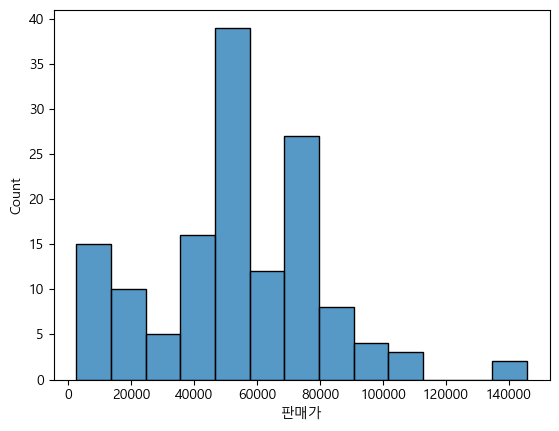

In [189]:
sns.histplot(df17, x='판매가')

In [190]:
#     - '판매가'의 정규성을 확인

stats.normaltest(df17['판매가']) # pvalue=0.11491665049462017
# p.value > 0.05 / 귀무가설 참 / 분포가 정규분포를 따른다

NormaltestResult(statistic=4.327096383410628, pvalue=0.11491665049462017)

In [191]:
cond1 = df17['연령대'].isin(['20대','30대'])

In [192]:
stats.bartlett(df17[cond1]['판매가'], df17[~cond1]['판매가'])
# p.value > 0.05 / 귀무가설 참 / 등분산

BartlettResult(statistic=0.1621478960589292, pvalue=0.6871866511387326)

In [193]:
stats.ttest_ind(df17[cond1]['판매가'], df17[~cond1]['판매가'])
# p.value > 0.05 / 귀무가설 참 / 평균의 차이가 없다

Ttest_indResult(statistic=0.10711905244541083, pvalue=0.9148489860519837)

In [194]:
# '연령대'와 '유입경로'의 연관성이 있는지 가설검정을 수행

df17_table = pd.crosstab(df17['연령대'], df17['유입경로'])
stats.chi2_contingency(df17_table)
# 통계량 / P.value / 자유도 / 기댓값
# P.value < 0.05 대립가설 참 / 연령대와 유입경로 간의 연관성이 있다.


(152.67041537335655,
 2.7096997515243808e-20,
 25,
 array([[ 1.83687943,  2.58156028,  0.44680851,  0.74468085,  0.89361702,
          0.4964539 ],
        [ 9.44680851, 13.27659574,  2.29787234,  3.82978723,  4.59574468,
          2.55319149],
        [22.30496454, 31.34751773,  5.42553191,  9.04255319, 10.85106383,
          6.02836879],
        [ 1.57446809,  2.21276596,  0.38297872,  0.63829787,  0.76595745,
          0.42553191],
        [ 1.57446809,  2.21276596,  0.38297872,  0.63829787,  0.76595745,
          0.42553191],
        [ 0.26241135,  0.36879433,  0.06382979,  0.10638298,  0.12765957,
          0.07092199]]))

## 2018년도 별 매출

In [195]:
# 2018년도 매출로
df18 = df2[df2['주문일시_년']==2018]
df18

,ID,나이,사용가능 적립금,성별,최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수량,수령인 주소,주문 시 회원등급,주문경로,주문번호,주문일시,카드사,쿠폰 할인금액,판매가,품목번호,결제수단_cut,주소,시도,주문일시_dt,주문일시_년,주문일시_월,주문일시_일,주문일시_분기,연령대
4,bear011,40,21908,남자,2018-12-19 오후 1:26,2018-12-19 오후 1:29,SNS광고,모바일,2017-01-17,사업자,사업자,무통장입금,51040.0,교환안함,0,D-20180512-0000093-00,무료,2018-05-18 오전 11:07,2018-05-22 오전 5:32,0,75390,"실링용기 2호 백색 1,150ml 800개 1박스",966.0,15000,1,경기도 부천시 원미구 상일로 126 (상동),사업자,PC쇼핑몰,20180512-0000093,2018-05-12 오후 2:10,카드아님,0,75390,9588,무통장입금,경기도 부천시 원미구 상일로 126 (상동),경기도,2018-05-12,2018,5,12,2,40대
5,bear011,40,21908,남자,2018-12-19 오후 1:26,2018-12-19 오후 1:29,SNS광고,모바일,2017-01-17,사업자,사업자,무통장입금,1910.0,교환안함,0,D-20180512-0000093-00,무료,2018-05-18 오전 11:07,2018-05-22 오전 5:32,0,0,사은품) 위생 청 수세미(3개),1136.0,0,1,경기도 부천시 원미구 상일로 126 (상동),사업자,PC쇼핑몰,20180512-0000093,2018-05-12 오후 2:10,카드아님,0,0,9589,무통장입금,경기도 부천시 원미구 상일로 126 (상동),경기도,2018-05-12,2018,5,12,2,40대
45,91559380@n,47,700,남자,2018-05-09 오후 1:49,2018-05-09 오후 2:32,블로그광고,PC,2017-02-02,개인,일반,카드,55000.0,교환안함,0,D-20180416-0000362-00,무료,2018-04-17 오후 6:14,2018-04-21 오전 5:32,0,77000,170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set(2박스),184.0,5300,1,광주광역시 서구 화운로 152 (화정동),일반,PC쇼핑몰,20180416-0000362,2018-04-16 오후 6:22,비씨,0,77000,7606,카드,광주광역시 서구 화운로 152 (화정동),광주광역시,2018-04-16,2018,4,16,2,40대
46,91559380@n,47,700,남자,2018-05-09 오후 1:49,2018-05-09 오후 2:32,블로그광고,PC,2017-02-02,개인,일반,카드,19030.0,교환안함,0,D-20180416-0000362-00,무료,2018-04-17 오후 6:14,2018-04-21 오전 5:32,0,0,사은품) 위생 랩 2호,353.0,0,1,광주광역시 서구 화운로 152 (화정동),일반,PC쇼핑몰,20180416-0000362,2018-04-16 오후 6:22,비씨,0,0,7607,카드,광주광역시 서구 화운로 152 (화정동),광주광역시,2018-04-16,2018,4,16,2,40대
47,91559380@n,47,700,남자,2018-05-09 오후 1:49,2018-05-09 오후 2:32,블로그광고,PC,2017-02-02,개인,일반,페이나우(카드),55000.0,교환안함,0,D-20180509-0000382-00,무료,2018-05-11 오후 2:05,2018-05-15 오전 5:32,0,81500,170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set(2박스),184.0,10000,1,광주광역시 서구 화운로 152 (화정동),일반,PC쇼핑몰,20180509-0000382,2018-05-09 오후 2:32,신한(구.LG카드 포함),0,81500,9320,카드,광주광역시 서구 화운로 152 (화정동),광주광역시,2018-05-09,2018,5,9,2,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18754,pp422,31,0,남자,2018-12-10 오전 9:12,2018-12-10 오전 9:15,이메일광고,PC,2018-05-31,개인,전화주문 고객,무통장입금,3000.0,교환안함,0,D-20180531-0000471-00,무료,2018-06-01 오후 5:37,2018-06-05 오전 5:32,0,0,위생 랩 4호,1159.0,0,1,경기도 용인시 기흥구 용구대로2469번길 20 (보정동),일반,PC쇼핑몰,20180531-0000471,2018-05-31 오후 5:27,카드아님,0,0,11760,무통장입금,경기도 용인시 기흥구 용구대로2469번길 20 (보정동),경기도,2018-05-31,2018,5,31,2,30대
18757,romandoll123,48,2790,남자,2018-06-14 오전 8:19,2018-06-14 오전 8:22,블로그광고,PC,2018-05-31,개인,일반,무통장입금,79200.0,교환안함,0,D-20180531-0000049-00,무료,2018-06-01 오후 3:12,2018-06-05 오전 5:32,0,109870,210파이 중화면용기 대 400개 1박스,1037.0,20000,1,부산광역시 해운대구 반여동 1212-2,일반,PC쇼핑몰,20180531-0000049,2018-05-31 오전 1:59,카드아님,0,109870,11640,무통장입금,부산광역시 해운대구 반여동 1212-2,부산광역시,2018-05-31,2018,5,31,2,40대
18758,romandoll123,48,2790,남자,2018-06-14 오전 8:19,2018-06-14 오전 8:22,블로그광고,PC,2018-05-31,개인,일반,무통장입금,3000.0,교환안함,0,D-20180531-0000049-00,무료,2018-06-01 오후 3:12,2018-06-05 오전 5:32,0,0,위생 랩 2호,1165.0,0,1,부산광역시 해운대구 반여동 1212-2,일반,PC쇼핑몰,20180531-0000049,2018-05-31 오전 1:59,카드아님,0,0,11641,무통장입금,부산광역시 해운대구 반여동 1212-2,부산광역시,2018-05-31,2018,5,31,2,40대
18761,yun5147,44,2050,남자,2018-06-05 오전 10:31,2018-06-05 오전 10:35,SNS광고,모바일,2018-05-31,사업자,사업자,카드,52800.0,교환안함,0,D-20180531-0000536-00,무료,2018-06-01 오후 5:37,2018-06-05 오전 5:32,0,85400,PP 7칸 도시락용기 L2 200개 1박스,450.0,15000,1,부산광역시 중구 광복로 96-1 (광복동1가),일반,모바일웹,20180531-0000536,2018-05-31 오후 11:29,삼성,0,85400,11775,카드,부산광역시 중구 광복로 96-1 (광복동1가),부산광역시,2018-05-31,2018,5,31,2,40대


In [196]:
df18.pivot_table(index='주문일시_월', values='판매가', aggfunc='sum')

,판매가
주문일시_월,
1,33937280
2,25279010
3,35709030
4,64742940
5,105309680


In [197]:
# 연령대별 판매가 가설검정

stats.normaltest(df18[df18['연령대'].isin(['20대','30대'])]['판매가'])
# p.value < 0.05 / 대립가설 참 / 분포가 정규분포를 따르지 않는다.

NormaltestResult(statistic=567.7912191759135, pvalue=5.078124209512846e-124)

In [198]:
#     - '판매가'의 정규성을 확인

stats.normaltest(df18['판매가'])
# p.value < 0.05 / 대립가설 참 / 분포가 정규분포를 따르지 않는다.

NormaltestResult(statistic=2119.2300905862367, pvalue=0.0)

In [199]:
cond18 = df18['연령대'].isin(['20대','30대'])

stats.ranksums(df18.loc[cond18]['판매가'],df18.loc[~cond18]['판매가'])
# P.value < 0.05 / 대립가설 참 / 두 집단의 판매가 값의 평균의 차이가 있다.

RanksumsResult(statistic=-2.2966556893942585, pvalue=0.02163841907455147)

## 2019년도 별 매출

In [200]:
# 2019년도 매출로
df19 = df2[df2['주문일시_년']==2019]
df19

,ID,나이,사용가능 적립금,성별,최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수량,수령인 주소,주문 시 회원등급,주문경로,주문번호,주문일시,카드사,쿠폰 할인금액,판매가,품목번호,결제수단_cut,주소,시도,주문일시_dt,주문일시_년,주문일시_월,주문일시_일,주문일시_분기,연령대
63,kyen1311,69,5820,여자,2019-03-24 오후 11:32,2019-03-24 오후 11:37,신문광고,PC,2017-03-03,사업자,사업자,무통장입금,71500.0,교환안함,0,D-20190114-0000629-00,무료,2019-01-16 오전 9:01,2019-01-20 오전 5:32,0,119020,사각 죽용기 소 550ml 500개 1set(2박스),88.0,27400,1,충청북도 청주시 서원구 남이면 가마3길 48,사업자,PC쇼핑몰,20190114-0000629,2019-01-14 오후 2:52,카드아님,0,119020,46242,무통장입금,충청북도 청주시 서원구 남이면 가마3길 48,충청북도,2019-01-14,2019,1,14,1,60대
64,kyen1311,69,5820,여자,2019-03-24 오후 11:32,2019-03-24 오후 11:37,신문광고,PC,2017-03-03,사업자,사업자,카드,71500.0,교환안함,0,D-20190324-0000373-00,무료,2019-03-25 오후 6:21,2019-03-29 오전 5:32,0,91620,사각 죽용기 소 550ml 500개 1set(2박스),88.0,0,1,충청북도 청주시 서원구 남이면 가마3길 48,사업자,PC쇼핑몰,20190324-0000373,2019-03-24 오후 11:37,현대,0,91620,63017,카드,충청북도 청주시 서원구 남이면 가마3길 48,충청북도,2019-03-24,2019,3,24,1,60대
75,xigol80,40,8150,남자,2019-05-03 오전 4:06,2019-05-03 오전 4:09,인터넷기사광고,PC,2017-03-08,사업자,사업자,"적립금,무통장입금",44000.0,교환안함,0,D-20190209-0000022-00,무료,2019-02-11 오후 6:58,2019-02-15 오전 5:32,36000,141240,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",42.0,19800,2,서울특별시 영등포구 여의도동,사업자,PC쇼핑몰,20190209-0000022,2019-02-09 오전 3:32,카드아님,0,70620,51896,무통장입금,서울특별시 영등포구 여의도동,서울특별시,2019-02-09,2019,2,9,1,40대
76,xigol80,40,8150,남자,2019-05-03 오전 4:06,2019-05-03 오전 4:09,인터넷기사광고,PC,2017-03-08,사업자,사업자,"적립금,무통장입금",49500.0,교환안함,0,D-20190318-0000031-00,무료,2019-03-19 오전 9:13,2019-03-23 오전 5:32,13600,65470,"70파이 다용도컵 세트 2호 대 80ml 백색 PS 3,000개 1set(2박스)",39.0,0,1,서울특별시 영등포구 여의도동,사업자,PC쇼핑몰,20190318-0000031,2019-03-18 오전 1:57,카드아님,0,65470,61271,무통장입금,서울특별시 영등포구 여의도동,서울특별시,2019-03-18,2019,3,18,1,40대
77,xigol80,40,8150,남자,2019-05-03 오전 4:06,2019-05-03 오전 4:09,인터넷기사광고,PC,2017-03-08,사업자,사업자,"적립금,무통장입금",44000.0,교환안함,0,D-20190318-0000031-01,무료,2019-03-19 오전 9:13,2019-03-23 오전 5:32,13600,60720,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",42.0,0,1,서울특별시 영등포구 여의도동,사업자,PC쇼핑몰,20190318-0000031,2019-03-18 오전 1:57,카드아님,0,60720,61272,무통장입금,서울특별시 영등포구 여의도동,서울특별시,2019-03-18,2019,3,18,1,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43518,1094652352@k,47,700,남자,2019-05-31 오전 10:05,2019-05-31 오전 10:07,블로그광고,PC,2019-05-31,개인,일반,"적립금,카드",60500.0,교환안함,0,D-20190531-0000101-00,무료,2019-05-31 오후 6:11,2019-06-04 오전 5:32,1000,77000,친환경 일체형 펄프용기 B003 500개(1BOX),1555.0,3800,1,전라북도 전주시 덕진구 출판로 43 (장동),일반,PC쇼핑몰,20190531-0000101,2019-05-31 오전 10:07,국민,0,77000,79647,카드,전라북도 전주시 덕진구 출판로 43 (장동),전라북도,2019-05-31,2019,5,31,2,40대
43519,1094746791@k,47,1200,남자,2019-05-31 오후 5:00,2019-05-31 오후 4:58,SNS광고,모바일,2019-05-31,개인,일반,카드,118800.0,교환안함,0,D-20190531-0000551-00,무료,2019-06-03 오후 6:08,2019-06-07 오전 5:32,0,167640,포기김치용기 투명 100개 1set(2박스/6.5L),1354.0,0,1,충청남도 공주시 한적2길 64-13 (금흥동),일반,모바일웹,20190531-0000551,2019-05-31 오후 4:58,NH (농협),0,167640,79776,카드,충청남도 공주시 한적2길 64-13 (금흥동),충청남도,2019-05-31,2019,5,31,2,40대
43520,1094746791@k,47,1200,남자,2019-05-31 오후 5:00,2019-05-31 오후 4:58,SNS광고,모바일,2019-05-31,개인,일반,카드,92400.0,교환안함,0,D-20190531-0000551-01,무료,2019-06-03 오후 6:08,2019-06-07 오전 5:32,0,132360,물김치용기 투명 100개 1set(2박스/직사각 5L),1353.0,0,1,충청남도 공주시 한적2길 64-13 (금흥동),일반,모바일웹,20190531-0000551,2019-05-31 오후 4:58,NH (농협),0,132360,79777,카드,충청남도 공주시 한적2길 64-13 (금흥동),충청남도,2019-05-31,2019,5,31,2,40대
43521,51775030@n,45,600,남자,2019-05-31 오후 2:41,2019-05-31 오후 3:17,SNS광고,모바일,2019-05-31,개인,일반,"적립금,카드",47850.0,교환안함,0,D-20190531-0000467-00,무료,2019-06-03 오후 6:08,2019-06-07 오전 5:32,1000,61900,195파이 탕용기 대 300개 1set(2박스),608.0,0,1,대전광역시 서구 도솔로 41 (도마동),일반,모바일웹,20190531-0000467,2019-05-31 오후 3:17,NH (농협),0,61900,79743,카드,대전광역시 서구 도솔로 41 (도마동),대전광역시,2019-05-31,2019,5,31,2,40대


In [201]:
df19.pivot_table(index='주문일시_월', values='판매가', aggfunc='sum')

,판매가
주문일시_월,
1,251804130
2,191546700
3,211737370
4,235040550
5,218907630


In [202]:
#     - '판매가'의 정규성을 확인

stats.normaltest(df19['판매가'])
# p.value > 0.05 / 대립가설 참 / 분포가 정규분포를 따르지 않는다.

NormaltestResult(statistic=19816.77470636672, pvalue=0.0)

In [203]:
cond19 = df19['연령대'].isin(['20대','30대'])

stats.ranksums(df19.loc[cond19]['판매가'],df19.loc[~cond19]['판매가'])
# P.value > 0.05 / 귀무가설 참 / 두 집단의 판매가 값의 평균의 차이가 없다.

RanksumsResult(statistic=-0.6689526725280561, pvalue=0.5035256686923594)

# restart

In [204]:
def func(row):
    if 20<=row<=23:
        return '20대초반'
    elif 24<=row<=26:
        return '20대중반'
    elif 27<=row<=29:
        return '20대후반'
    elif 30<=row<=33:
        return '30대초반'
    elif 34<=row<=36:
        return '30대중반'
    elif 37<=row<=39:
        return '30대후반'
    elif 40<=row<50:
        return '40대'
    elif 50<=row<60:
        return '50대'
    elif 60<=row<70:
        return '60대'
    elif 70<=row<80:
        return '70대'
    elif 80<=row<90:
        return '80대'
    elif 90<=row:
        return '90대'

df['연령대'] = df['나이'].apply(func)

In [205]:
df.columns

Index(['ID', '나이', '사용가능 적립금', '성별', '최종접속일', '최종주문일', '유입경로', '유입기기',
       '회원 가입일', '사업자구분', '회원구분', '결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호',
       '배송비 정보', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액', '상품명', '상품번호',
       '상품별 추가할인금액', '수량', '수령인 주소', '주문 시 회원등급', '주문경로', '주문번호', '주문일시',
       '카드사', '쿠폰 할인금액', '판매가', '품목번호', '결제수단_cut', '주소', '시도', '주문일시_dt',
       '주문일시_년', '주문일시_월', '주문일시_일', '주문일시_분기', '연령대'],
      dtype='object')

In [206]:
print(stats.normaltest(df.loc[df['연령대']=='20대초반']['판매가']))
print(stats.normaltest(df.loc[df['연령대']=='20대중반']['판매가']))
print(stats.normaltest(df.loc[df['연령대']=='20대후반']['판매가']))
print(stats.normaltest(df.loc[df['연령대']=='30대초반']['판매가']))
print(stats.normaltest(df.loc[df['연령대']=='30대중반']['판매가']))
print(stats.normaltest(df.loc[df['연령대']=='30대후반']['판매가']))

NormaltestResult(statistic=2263.791930502665, pvalue=0.0)
NormaltestResult(statistic=18.494942600108345, pvalue=9.635499713442331e-05)
NormaltestResult(statistic=6.703464564177024, pvalue=0.035023630712852714)
NormaltestResult(statistic=519.545759250804, pvalue=1.5207990430111337e-113)
NormaltestResult(statistic=1230.3335722493962, pvalue=6.862136234490152e-268)
NormaltestResult(statistic=1406.5544302844237, pvalue=3.7203707004027243e-306)


In [207]:
df['연령대'].value_counts().index
age_list = ['20대초반', '20대중반', '20대후반', '30대초반', '30대중반', '30대후반']
df_a = df[df['연령대'].isin(age_list)]

In [208]:
df_a_m = df_a.pivot_table(index='연령대', values='판매가',columns='주문일시_년', aggfunc='sum').reset_index()
df_a_m

주문일시_년,연령대,2017,2018,2019
0,20대중반,1860630,64289620,67156520
1,20대초반,624220,60934390,60345850
2,20대후반,2736830,85235450,89237220
3,30대중반,5031420,77046520,56902780
4,30대초반,7554070,153990980,117552050
5,30대후반,3635140,64912890,55058070


<AxesSubplot:xlabel='연령대', ylabel='판매가'>

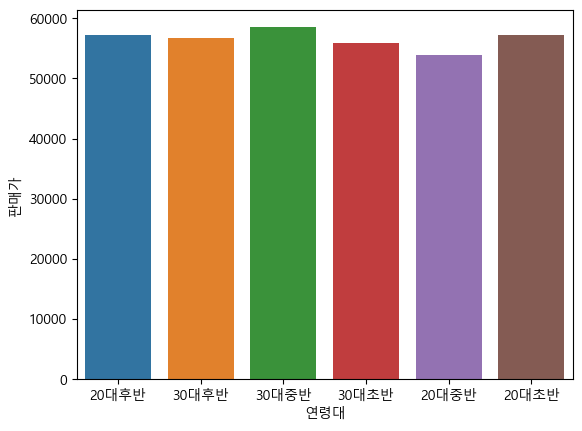

In [209]:
sns.barplot(data=df_a, x='연령대', y='판매가', ci=None)

<AxesSubplot:xlabel='연령대', ylabel='2017'>

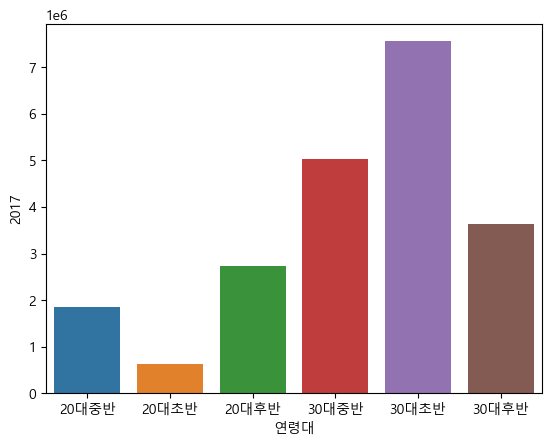

In [210]:
sns.barplot(data=df_a_m, x='연령대', y=2017, ci=None)


<AxesSubplot:xlabel='연령대', ylabel='2018'>

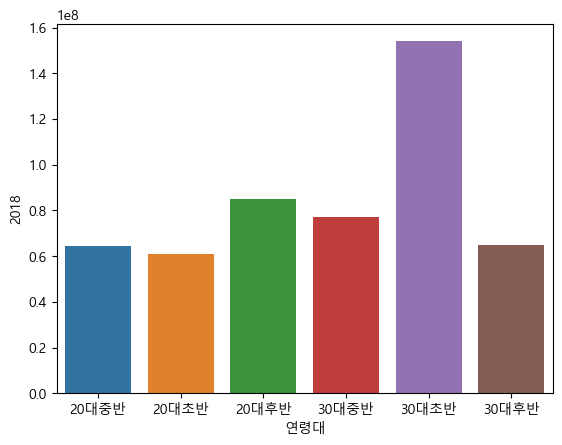

In [211]:
sns.barplot(data=df_a_m, x='연령대', y=2018, ci=None)


<AxesSubplot:xlabel='연령대', ylabel='2019'>

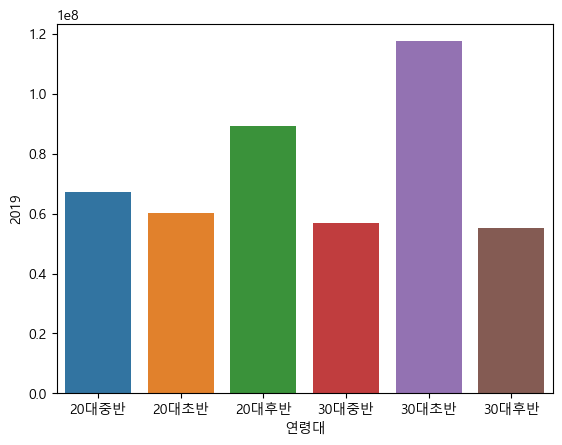

In [212]:
sns.barplot(data=df_a_m, x='연령대', y=2019, ci=None)

## 2017

In [213]:
df_17 = df[df['주문일시_년']==2017]

In [214]:
print(stats.normaltest(df_17.loc[df_17['연령대']=='20대초반']['판매가'])) # F
print(stats.normaltest(df_17.loc[df_17['연령대']=='20대중반']['판매가'])) # F
print(stats.normaltest(df_17.loc[df_17['연령대']=='20대후반']['판매가'])) # F
print(stats.normaltest(df_17.loc[df_17['연령대']=='30대초반']['판매가'])) # F
print(stats.normaltest(df_17.loc[df_17['연령대']=='30대중반']['판매가'])) # T
print(stats.normaltest(df_17.loc[df_17['연령대']=='30대후반']['판매가'])) # F

NormaltestResult(statistic=19.529252868180404, pvalue=5.744822594722311e-05)
NormaltestResult(statistic=15.796067613373308, pvalue=0.00037147321103093447)
NormaltestResult(statistic=12.212087372829068, pvalue=0.002229353409580982)
NormaltestResult(statistic=926.4583354683037, pvalue=6.639396366162164e-202)
NormaltestResult(statistic=2.5057453027641583, pvalue=0.28568294946521045)
NormaltestResult(statistic=10.215771579069914, pvalue=0.006048857973097593)


c:\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## 2018

In [215]:
df_18 = df[df['주문일시_년']==2018]

In [216]:
print(stats.normaltest(df_18.loc[df_18['연령대']=='20대초반']['판매가'])) # F
print(stats.normaltest(df_18.loc[df_18['연령대']=='20대중반']['판매가'])) # F
print(stats.normaltest(df_18.loc[df_18['연령대']=='20대후반']['판매가'])) # F
print(stats.normaltest(df_18.loc[df_18['연령대']=='30대초반']['판매가'])) # F
print(stats.normaltest(df_18.loc[df_18['연령대']=='30대중반']['판매가'])) # F
print(stats.normaltest(df_18.loc[df_18['연령대']=='30대후반']['판매가'])) # F

NormaltestResult(statistic=224.13677346585044, pvalue=2.134607574183215e-49)
NormaltestResult(statistic=293.55873296591363, pvalue=1.796929668343037e-64)
NormaltestResult(statistic=194.91129407623066, pvalue=4.737511323681209e-43)
NormaltestResult(statistic=262.25569809171174, pvalue=1.12693465814926e-57)
NormaltestResult(statistic=778.8878081677492, pvalue=7.356334105124747e-170)
NormaltestResult(statistic=837.7372585839978, pvalue=1.2236737848430397e-182)


## 2019

In [217]:
df_19 = df[df['주문일시_년']==2019]

In [218]:
print(stats.normaltest(df_19.loc[df_19['연령대']=='20대초반']['판매가'])) # F
print(stats.normaltest(df_19.loc[df_19['연령대']=='20대중반']['판매가'])) # F
print(stats.normaltest(df_19.loc[df_19['연령대']=='20대후반']['판매가'])) # F
print(stats.normaltest(df_19.loc[df_19['연령대']=='30대초반']['판매가'])) # F
print(stats.normaltest(df_19.loc[df_19['연령대']=='30대중반']['판매가'])) # F
print(stats.normaltest(df_19.loc[df_19['연령대']=='30대후반']['판매가'])) # F

NormaltestResult(statistic=1706.2093220749744, pvalue=0.0)
NormaltestResult(statistic=122.82500022640446, pvalue=2.1325051121488083e-27)
NormaltestResult(statistic=268.2245193606879, pvalue=5.698829519540133e-59)
NormaltestResult(statistic=710.2714055069164, pvalue=5.8414944356457705e-155)
NormaltestResult(statistic=102.25694179081668, pvalue=6.240037821212477e-23)
NormaltestResult(statistic=657.8138110021578, pvalue=1.4372948882438825e-143)


# 데이터 3개 병합

In [219]:
print(master_member.columns)

print(master_product.columns)

print(log_order.columns)

Index(['ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일', '유입경로',
       '유입기기', '회원 가입일', '사업자구분', '회원구분'],
      dtype='object')
Index(['#', '공급사', '과세/면세', '담기', '매입가', '상품명(기본)', '상품코드', '재입고알림', '제조사',
       '카테고리', '판매가', '품절여부', '후기'],
      dtype='object')
Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', 'ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호'],
      dtype='object')


In [220]:
df2 = pd.merge(master_member, log_order, left_on='ID', right_on='ID', how='inner')
df3 = pd.merge(df2, master_product, left_on='상품번호', right_on='상품코드', how='inner')

In [221]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 0 to 30717
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          30718 non-null  object 
 1   나이          30718 non-null  int64  
 2   사용가능 적립금    30718 non-null  int64  
 3   성별          30718 non-null  object 
 4   주소(동/읍/면)   30463 non-null  object 
 5   최종접속일       30718 non-null  object 
 6   최종주문일       30718 non-null  object 
 7   유입경로        30718 non-null  object 
 8   유입기기        30718 non-null  object 
 9   회원 가입일      30718 non-null  object 
 10  사업자구분       30718 non-null  object 
 11  회원구분        30718 non-null  object 
 12  결제수단        30718 non-null  object 
 13  공급원가        30718 non-null  float64
 14  교환구분        30718 non-null  object 
 15  네이버 포인트     30718 non-null  int64  
 16  배송번호        30718 non-null  object 
 17  배송비 정보      30718 non-null  object 
 18  배송시작일       30718 non-null  object 
 19  배송완료일       30718 non-nul

In [222]:
df3.isnull().sum()

ID                0
나이                0
사용가능 적립금          0
성별                0
주소(동/읍/면)       255
최종접속일             0
최종주문일             0
유입경로              0
유입기기              0
회원 가입일            0
사업자구분             0
회원구분              0
결제수단              0
공급원가              0
교환구분              0
네이버 포인트           0
배송번호              0
배송비 정보            0
배송시작일             0
배송완료일             0
사용한 적립금액          0
상품구매금액            0
상품명               0
상품번호              0
상품별 추가할인금액        0
수량                0
수령인 주소            0
주문 시 회원등급         0
주문경로              0
주문번호              0
주문일시              0
카드사           20253
쿠폰 할인금액           0
판매가_x             0
품목번호              0
#                 0
공급사               0
과세/면세             0
담기                0
매입가               0
상품명(기본)           0
상품코드              0
재입고알림             0
제조사              21
카테고리              0
판매가_y             0
품절여부              0
후기                0
dtype: int64

In [223]:
df3['카드사'] = df3['카드사'].fillna('카드아님')

In [224]:
df3.isnull().sum()

ID              0
나이              0
사용가능 적립금        0
성별              0
주소(동/읍/면)     255
최종접속일           0
최종주문일           0
유입경로            0
유입기기            0
회원 가입일          0
사업자구분           0
회원구분            0
결제수단            0
공급원가            0
교환구분            0
네이버 포인트         0
배송번호            0
배송비 정보          0
배송시작일           0
배송완료일           0
사용한 적립금액        0
상품구매금액          0
상품명             0
상품번호            0
상품별 추가할인금액      0
수량              0
수령인 주소          0
주문 시 회원등급       0
주문경로            0
주문번호            0
주문일시            0
카드사             0
쿠폰 할인금액         0
판매가_x           0
품목번호            0
#               0
공급사             0
과세/면세           0
담기              0
매입가             0
상품명(기본)         0
상품코드            0
재입고알림           0
제조사            21
카테고리            0
판매가_y           0
품절여부            0
후기              0
dtype: int64

In [225]:
df3[df3['주소(동/읍/면)'].isna()]

,ID,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수량,수령인 주소,주문 시 회원등급,주문경로,주문번호,주문일시,카드사,쿠폰 할인금액,판매가_x,품목번호,#,공급사,과세/면세,담기,매입가,상품명(기본),상품코드,재입고알림,제조사,카테고리,판매가_y,품절여부,후기
360,144151978@n,46,3300,남자,NaN,2019-03-15 오후 8:56,2019-03-13 오후 5:09,SNS광고,모바일,2019-03-13,개인,일반,무통장입금,51700.0,교환안함,0,D-20190313-0000943-00,무료,2019-03-15 오전 10:12,2019-03-19 오전 5:32,0,64070,"105파이 다용도컵 세트 5호 대 370ml 백색 PS 1,000개 1set(2박스)",45.0,0,1,울산광역시 남구 대학로 32 (무거동),일반,모바일웹,20190313-0000943,2019-03-13 오후 5:09,카드아님,0,64070,60438,1013,패커스,과세,17,51700,"105파이 다용도컵 세트 5호 대 370ml 백색 PS 1,000개 1set(2박스)",45,사용함,자체제작,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,64070,정상,30
376,76136945@n,47,600,남자,NaN,2019-04-16 오전 10:02,2019-04-16 오전 10:53,SNS광고,모바일,2019-04-16,개인,일반,"적립금,무통장입금",51700.0,교환안함,0,D-20190416-0000202-00,무료,2019-04-16 오후 6:26,2019-04-20 오전 5:32,1000,64070,"105파이 다용도컵 세트 5호 대 370ml 백색 PS 1,000개 1set(2박스)",45.0,0,1,경상남도 양산시 고연로 283 (용당동),일반,모바일웹,20190416-0000202,2019-04-16 오전 10:53,카드아님,0,64070,68685,1013,패커스,과세,17,51700,"105파이 다용도컵 세트 5호 대 370ml 백색 PS 1,000개 1set(2박스)",45,사용함,자체제작,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,64070,정상,30
383,39782363@n,41,2100,남자,NaN,2019-05-08 오전 11:23,2019-05-08 오전 11:29,SNS광고,모바일,2019-04-30,개인,일반,무통장입금,51700.0,교환안함,0,D-20190508-0000359-00,무료,2019-05-09 오후 6:32,2019-05-13 오전 5:32,0,64070,"105파이 다용도컵 세트 5호 대 370ml 백색 PS 1,000개 1set(2박스)",45.0,0,1,울산광역시 남구 무거동 491-1,일반,모바일웹,20190508-0000359,2019-05-08 오전 11:29,카드아님,0,64070,74236,1013,패커스,과세,17,51700,"105파이 다용도컵 세트 5호 대 370ml 백색 PS 1,000개 1set(2박스)",45,사용함,자체제작,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,64070,정상,30
695,1075139712@k,47,100,남자,NaN,2019-04-30 오후 5:13,2019-04-30 오후 5:17,SNS광고,모바일,2019-04-30,개인,일반,"적립금,카드",84700.0,교환안함,0,D-20190430-0001051-00,무료,2019-05-03 오전 11:13,2019-05-07 오전 5:32,1000,107970,"사각 찜용기 대 3,200ml 200개 1set(2박스)",72.0,0,1,대전광역시 유성구 원내로 28 (원내동),일반,모바일웹,20190430-0001051,2019-04-30 오후 5:17,외환,0,107970,72367,1003,패커스,과세,3,34650,"사각찜용기 대 3,200ml 100개 1set(2박스)",72,사용함,자체제작,038 : 한식(분식) 용기\n038001 : 한식(분식) 용기 > 탕/찜/죽/면용...,59600,정상,1
697,66860271@n,48,3000,남자,NaN,2019-05-13 오후 9:23,2019-05-13 오후 9:35,블로그광고,PC,2019-05-13,개인,일반,무통장입금,84700.0,교환안함,0,D-20190513-0001107-00,무료,2019-05-14 오후 6:51,2019-05-18 오전 5:32,0,107970,"사각 찜용기 대 3,200ml 200개 1set(2박스)",72.0,0,1,서울특별시 서초구 양재동,일반,PC쇼핑몰,20190513-0001107,2019-05-13 오후 9:35,카드아님,0,107970,75512,1003,패커스,과세,3,34650,"사각찜용기 대 3,200ml 100개 1set(2박스)",72,사용함,자체제작,038 : 한식(분식) 용기\n038001 : 한식(분식) 용기 > 탕/찜/죽/면용...,59600,정상,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30682,30988933@n,44,1500,남자,NaN,2019-05-21 오후 2:33,2019-05-21 오후 2:39,SNS광고,모바일,2019-05-09,개인,일반,무통장입금,12680.0,교환안함,0,D-20190521-0000608-02,무료,2019-05-24 오전 10:17,2019-05-28 오전 5:32,0,21000,생수1800 60개(1BOX),1439.0,0,1,울산광역시 울주군 온양읍 화산발리로 742-10,일반,모바일웹,20190521-0000608,2019-05-21 오후 2:39,카드아님,0,21000,77353,633,패커스,과세,0,12680,생수1800 60개(1BOX),1439,사용함,자체제작,043 : 베이커리/카페 용기\n043004 : 베이커리/카페 용기 > 생수/쥬스/...,21000,정상,0
30704,28023986@n,30,500,남자,NaN,2019-05-30 오후 7:43,2019-05-30 오후 7:49,카카오톡광고,모바일,2019-04-04,개인,일반,"적립금,카드",14520.0,교환안함,0,D-20190404-0000578-00,무료,2019-04-05 오후 12:07,2019-04-09 오전 5:32,1000,27100,목향 양념단지 2호 10개(1BOX),1522.0,0,1,부산광역시 사하구 낙동대로199번길 16 (괴정동),일반,모바일웹,20190404-0000578,2019-04-04 오후 12:34,삼성,0,27100,66077,572,다이찌롱스토어,과세,0,14520,목향 양념단지 2호 10개(1BOX),1522,사용함,자체제작,046 : 주방용품/소모품\n046007 : 주방용품/소모품 > 주방용품\n0460...,18000,정상,0
30706,42406456@n,44,2600,남자,NaN,2019-05-29 오후 1:35,2019-05-29 오후 1:48,블로그광고,PC,2019-04-10,개인,일반,카드,35200.0,교환안함,0,D-20190507-0001481-00,무료,2019-05-09 오전 11:07,2019-05-13 오전 5:32,0,46000,무지 종이용기 850ml 500개(1BOX),1567.0,5010,1,울산광역시 북구 명촌1길 14-2 (진장동),일반,PC쇼핑몰,20190507-0001481,2019-05-07 오후 6:23,삼성,0,46000,74071,545,패커스,과세,2,40700,"친환경 펄프접시 P004 1,0

In [226]:
df3.loc[df3['주소(동/읍/면)'].isna()]['주소(동/읍/면)'] = df3.loc[df3['주소(동/읍/면)'].isna()]['수령인 주소']

C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_3504\13711993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[df3['주소(동/읍/면)'].isna()]['주소(동/읍/면)'] = df3.loc[df3['주소(동/읍/면)'].isna()]['수령인 주소']


In [227]:
df3.loc[df3['주소(동/읍/면)'].isna()]['주소(동/읍/면)'].iloc[0]
df3.loc[df3['주소(동/읍/면)'].isna()]['수령인 주소'].iloc[0]

len(df3.loc[df3['주소(동/읍/면)'].isna()])

255

In [228]:
for i in range(len(df3.loc[df3['주소(동/읍/면)'].isna()])) : 
    df3.loc[df3['주소(동/읍/면)'].isna()]['주소(동/읍/면)'].iloc[i] = df3.loc[df3['주소(동/읍/면)'].isna()]['수령인 주소'].iloc[i]


C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_3504\1938599534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[df3['주소(동/읍/면)'].isna()]['주소(동/읍/면)'].iloc[i] = df3.loc[df3['주소(동/읍/면)'].isna()]['수령인 주소'].iloc[i]


In [229]:
df3.loc[df3['주소(동/읍/면)'].isna()]['주소(동/읍/면)'] = df3.loc[df3['주소(동/읍/면)'].isna()]['수령인 주소']

C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_3504\13711993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[df3['주소(동/읍/면)'].isna()]['주소(동/읍/면)'] = df3.loc[df3['주소(동/읍/면)'].isna()]['수령인 주소']


In [230]:
df3 = df3.dropna()

In [231]:
def func(row):
        if row<30:
                return '20대'
        elif 30<=row<40:
                return '30대'
        elif 40<=row<50:
                return '40대'
        elif 50<=row<60:
                return '50대'
        elif 60<=row<70:
                return '60대'
        elif 70<=row<80:
                return '70대'
        elif 80<=row<90:
                return '80대'
        elif 90<=row:
                return '90대'

df3['연령대'] = df3['나이'].apply(func)

In [232]:
def func(data):
    return data.split(' ')[0]

df3['주문일시_dt'] = pd.to_datetime(df3['주문일시'].apply(func))

In [233]:
df3['주문일시_년'] = df3['주문일시_dt'].dt.year
df3['주문일시_월'] = df3['주문일시_dt'].dt.month
df3['주문일시_일'] = df3['주문일시_dt'].dt.day
df3['주문일시_분기'] = df3['주문일시_dt'].dt.quarter

In [234]:
def func4(data) : 
    return data.split(' ')[0]

df3['배송시작일_dt'] = pd.to_datetime(df3['배송시작일'].apply(func4))
df3['배송완료일_dt'] = pd.to_datetime(df3['배송완료일'].apply(func4))

In [235]:
df3['배송시간'] = df3['배송완료일_dt'] - df3['배송시작일_dt']
df3['배송시간']

0        0 days
1        2 days
2        4 days
3       10 days
4        2 days
          ...  
30710    4 days
30712    4 days
30713    4 days
30714    4 days
30716    4 days
Name: 배송시간, Length: 30443, dtype: timedelta64[ns]

In [236]:
def func3(row):
        row = row.split(' ')[0]
        return row
    
df3['시도'] = df3['수령인 주소'].apply(func3)

In [237]:
def func6(data) : 
    if data < 100000 :
        return '1만원대'
    else : 
        return '10만원대'

df3['가격대'] = df3['판매가_x'].apply(func6)

In [238]:
df3_m = df3[df3['연령대'].isin(['20대','30대'])]

In [239]:
df3_m.columns

Index(['ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일', '유입경로',
       '유입기기', '회원 가입일', '사업자구분', '회원구분', '결제수단', '공급원가', '교환구분', '네이버 포인트',
       '배송번호', '배송비 정보', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액', '상품명', '상품번호',
       '상품별 추가할인금액', '수량', '수령인 주소', '주문 시 회원등급', '주문경로', '주문번호', '주문일시',
       '카드사', '쿠폰 할인금액', '판매가_x', '품목번호', '#', '공급사', '과세/면세', '담기', '매입가',
       '상품명(기본)', '상품코드', '재입고알림', '제조사', '카테고리', '판매가_y', '품절여부', '후기', '연령대',
       '주문일시_dt', '주문일시_년', '주문일시_월', '주문일시_일', '주문일시_분기', '배송시작일_dt',
       '배송완료일_dt', '배송시간', '시도', '가격대'],
      dtype='object')

# 모델링

In [240]:
# 2. 지도학습에 필요한 라이브러리를 호출
from sklearn.model_selection import train_test_split
from sklearn.compose        import make_column_transformer
from sklearn.impute import KNNImputer
from imblearn.pipeline      import pipeline
from imblearn.pipeline      import make_pipeline
from sklearn.impute         import SimpleImputer, KNNImputer
from sklearn.preprocessing  import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV    # 교차검증
from sklearn.metrics   import classification_report     # 평가
import pickle
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor # Bagging Model 
from sklearn.tree import DecisionTreeClassifier


In [241]:
df3_m.columns

Index(['ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일', '유입경로',
       '유입기기', '회원 가입일', '사업자구분', '회원구분', '결제수단', '공급원가', '교환구분', '네이버 포인트',
       '배송번호', '배송비 정보', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액', '상품명', '상품번호',
       '상품별 추가할인금액', '수량', '수령인 주소', '주문 시 회원등급', '주문경로', '주문번호', '주문일시',
       '카드사', '쿠폰 할인금액', '판매가_x', '품목번호', '#', '공급사', '과세/면세', '담기', '매입가',
       '상품명(기본)', '상품코드', '재입고알림', '제조사', '카테고리', '판매가_y', '품절여부', '후기', '연령대',
       '주문일시_dt', '주문일시_년', '주문일시_월', '주문일시_일', '주문일시_분기', '배송시작일_dt',
       '배송완료일_dt', '배송시간', '시도', '가격대'],
      dtype='object')

## DecisionTreeClassifier

In [242]:
df3_m['공급사'].value_counts().index

Index(['패커스', '다이찌롱스토어'], dtype='object')

In [243]:
df3_m.columns

Index(['ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일', '유입경로',
       '유입기기', '회원 가입일', '사업자구분', '회원구분', '결제수단', '공급원가', '교환구분', '네이버 포인트',
       '배송번호', '배송비 정보', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액', '상품명', '상품번호',
       '상품별 추가할인금액', '수량', '수령인 주소', '주문 시 회원등급', '주문경로', '주문번호', '주문일시',
       '카드사', '쿠폰 할인금액', '판매가_x', '품목번호', '#', '공급사', '과세/면세', '담기', '매입가',
       '상품명(기본)', '상품코드', '재입고알림', '제조사', '카테고리', '판매가_y', '품절여부', '후기', '연령대',
       '주문일시_dt', '주문일시_년', '주문일시_월', '주문일시_일', '주문일시_분기', '배송시작일_dt',
       '배송완료일_dt', '배송시간', '시도', '가격대'],
      dtype='object')

In [246]:
len(df3_m['판매가_x'])

12319

In [247]:
df3_m['후기'].value_counts()

10     671
0      658
71     599
9      598
68     590
96     577
67     560
2      525
80     503
6      441
1      391
18     386
37     376
174    367
17     363
43     308
30     277
3      251
4      243
39     232
14     221
79     212
8      208
26     189
38     183
11     179
15     170
22     167
60     157
5      152
44     151
32     148
19     147
46     133
20     131
16     119
25     115
51     109
50     100
47     100
7       78
34      70
12      58
31      56
24      50
Name: 후기, dtype: int64

# Regression

In [248]:
df3_m.columns

Index(['ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일', '유입경로',
       '유입기기', '회원 가입일', '사업자구분', '회원구분', '결제수단', '공급원가', '교환구분', '네이버 포인트',
       '배송번호', '배송비 정보', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액', '상품명', '상품번호',
       '상품별 추가할인금액', '수량', '수령인 주소', '주문 시 회원등급', '주문경로', '주문번호', '주문일시',
       '카드사', '쿠폰 할인금액', '판매가_x', '품목번호', '#', '공급사', '과세/면세', '담기', '매입가',
       '상품명(기본)', '상품코드', '재입고알림', '제조사', '카테고리', '판매가_y', '품절여부', '후기', '연령대',
       '주문일시_dt', '주문일시_년', '주문일시_월', '주문일시_일', '주문일시_분기', '배송시작일_dt',
       '배송완료일_dt', '배송시간', '시도', '가격대'],
      dtype='object')

In [249]:
df3_m['상품별 추가할인금액'].value_counts().index

Int64Index([    0, 15000, 10000, 30000, 14500, 13600,  8800, 17400, 15800,
            20000,
            ...
             2220,  8990, 65000, 36840, 49120, 59400,  6250,  7530, 12700,
             6010],
           dtype='int64', length=394)

In [250]:
df3_m['주문일시_일'].value_counts()

# column 설정할떄 feature importance 알고리즘으로 정하는것, 우리 주관적의견

7     499
15    459
28    453
23    452
14    451
8     442
26    441
11    441
13    432
30    430
29    425
21    415
3     412
22    412
10    411
18    411
2     408
27    402
12    395
19    391
20    382
17    379
25    378
24    378
9     369
4     352
5     341
16    329
6     311
1     293
31    225
Name: 주문일시_일, dtype: int64

In [288]:
X = df3_m[['유입기기','수량','사업자구분','상품별 추가할인금액','제조사','주문일시_월','품절여부']]
Y = df3_m['판매가_x']

In [252]:
df3_m['회원구분'].value_counts()

전화주문 고객     5150
사업자         5087
일반          1831
딜러 유치 회원     251
Name: 회원구분, dtype: int64

In [289]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1234)

numeric_pipe = make_pipeline(SimpleImputer(), StandardScaler())
category_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

numeric_list = X.describe().columns.tolist()
category_list = X.describe(include='object').columns.tolist()

preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list), (category_pipe, category_list))

In [290]:
preprocessing_pipe

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['수량', '상품별 추가할인금액', '주문일시_월']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['유입기기', '사업자구분', '제조사', '품절여부'])])

## DecisionTreeRegressor

In [255]:
model_pipe = make_pipeline(preprocessing_pipe, DecisionTreeRegressor())

hyperparameter_list = {'decisiontreeregressor__max_depth' : range(5,10),
                        'decisiontreeregressor__min_samples_split' : range(5,10),
                        'decisiontreeregressor__min_samples_leaf' : range(5,10)}

grid_model = GridSearchCV(model_pipe, cv=5, param_grid={}, n_jobs=-1)
grid_model.fit(X_train, Y_train)

# 6. 평가
best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

print(f'Y_train_pred : {Y_train_pred}\n')
print(f'Y_test_pred : {Y_test_pred}\n')
# 평가
print(f'r2_score_train : {r2_score(Y_train, Y_train_pred)}\n')
print(f'r2_score_test : {r2_score(Y_test, Y_test_pred)}\n')

encoder_list = best_model.named_steps['columntransformer'].transformers_[1][1].named_steps['onehotencoder'].get_feature_names().tolist()
df_importance = pd.DataFrame()
df_importance['Feature'] = pd.Series(numeric_list + encoder_list)

df_importance['Importance']= best_model['decisiontreeregressor'].feature_importances_
df_importance.sort_values(by='Importance', ascending=False)

Y_train_pred : [77370.         67974.75935829 10170.         ... 66603.36158192
 14660.         63470.        ]

Y_test_pred : [64687.8125     22110.         52360.         ... 52605.58139535
 60220.32258065 66920.        ]

r2_score_train : 0.6233799052385063

r2_score_test : 0.5212758486545437



c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Feature,Importance
1,상품별 추가할인금액,0.759858
0,수량,0.176071
2,주문일시_월,0.040052
11,x3_정상,0.005509
4,x0_모바일,0.004057
3,x0_PC,0.003530
5,x1_개인,0.003432
10,x2_자체제작,0.002805
6,x1_사업자,0.002689
12,x3_품절,0.001685


## XGBRegressor

In [256]:
# df_copy = new_df[new_df['판매가'] != 1000000.0]""
# sns.histplot(data=df_copy, x='판매가')

In [296]:
# 4. 파이프라인을 구성한다.
numeric_pipe = make_pipeline(KNNImputer(), MinMaxScaler())
category_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())
numeric_list = X.describe().columns.tolist()
category_list = X.describe(include='object').columns.tolist()
preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list)
                                            , (category_pipe, category_list))
model_pipe = make_pipeline(preprocessing_pipe, XGBRegressor())

hyperparameter_list = {
 'xgbregressor__max_depth':range(5,11),
 'xgbregressor__min_depth':range(5,11)
}

grid_model = GridSearchCV(model_pipe, cv=5, param_grid={}, n_jobs=-1)
grid_model.fit(X_train, Y_train)

# 6. 평가
best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)


print(f'Y_train_pred : {Y_train_pred}\n')
print(f'Y_test_pred : {Y_test_pred}\n')
# 평가
print(f'r2_score_train : {r2_score(Y_train, Y_train_pred)}\n')
print(f'r2_score_test : {r2_score(Y_test, Y_test_pred)}\n')


encoder_list = best_model.named_steps['columntransformer'].transformers_[1][1].named_steps['onehotencoder'].get_feature_names().tolist()
df_importance = pd.DataFrame()
df_importance['Feature'] = pd.Series(numeric_list + encoder_list)
df_importance['Importance']= best_model['xgbregressor'].feature_importances_
df_importance.sort_values(by='Importance', ascending=False)


Y_train_pred : [78736.02  67190.71  10685.163 ... 66330.2   17478.76  64086.15 ]

Y_test_pred : [65633.02  17629.523 53688.17  ... 52889.79  59370.508 57588.586]

r2_score_train : 0.6165655181564621

r2_score_test : 0.5685826024944323



c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Feature,Importance
1,상품별 추가할인금액,0.325569
0,수량,0.325536
11,x3_정상,0.113685
10,x2_자체제작,0.078052
9,x2_Y-MD-00748,0.074604
2,주문일시_월,0.046430
3,x0_PC,0.015732
5,x1_개인,0.014332
7,x2_Y-MD-00739,0.004069
8,x2_Y-MD-00739★,0.001991


In [316]:
df_importance.sort_values(by='Importance', ascending=False).index

Int64Index([1, 0, 11, 10, 9, 2, 3, 5, 7, 8, 4, 6, 12], dtype='int64')

,Feature,Importance
1,상품별 추가할인금액,0.325569
0,수량,0.325536
11,x3_정상,0.113685
10,x2_자체제작,0.078052
9,x2_Y-MD-00748,0.074604
2,주문일시_월,0.046430
3,x0_PC,0.015732
5,x1_개인,0.014332
7,x2_Y-MD-00739,0.004069


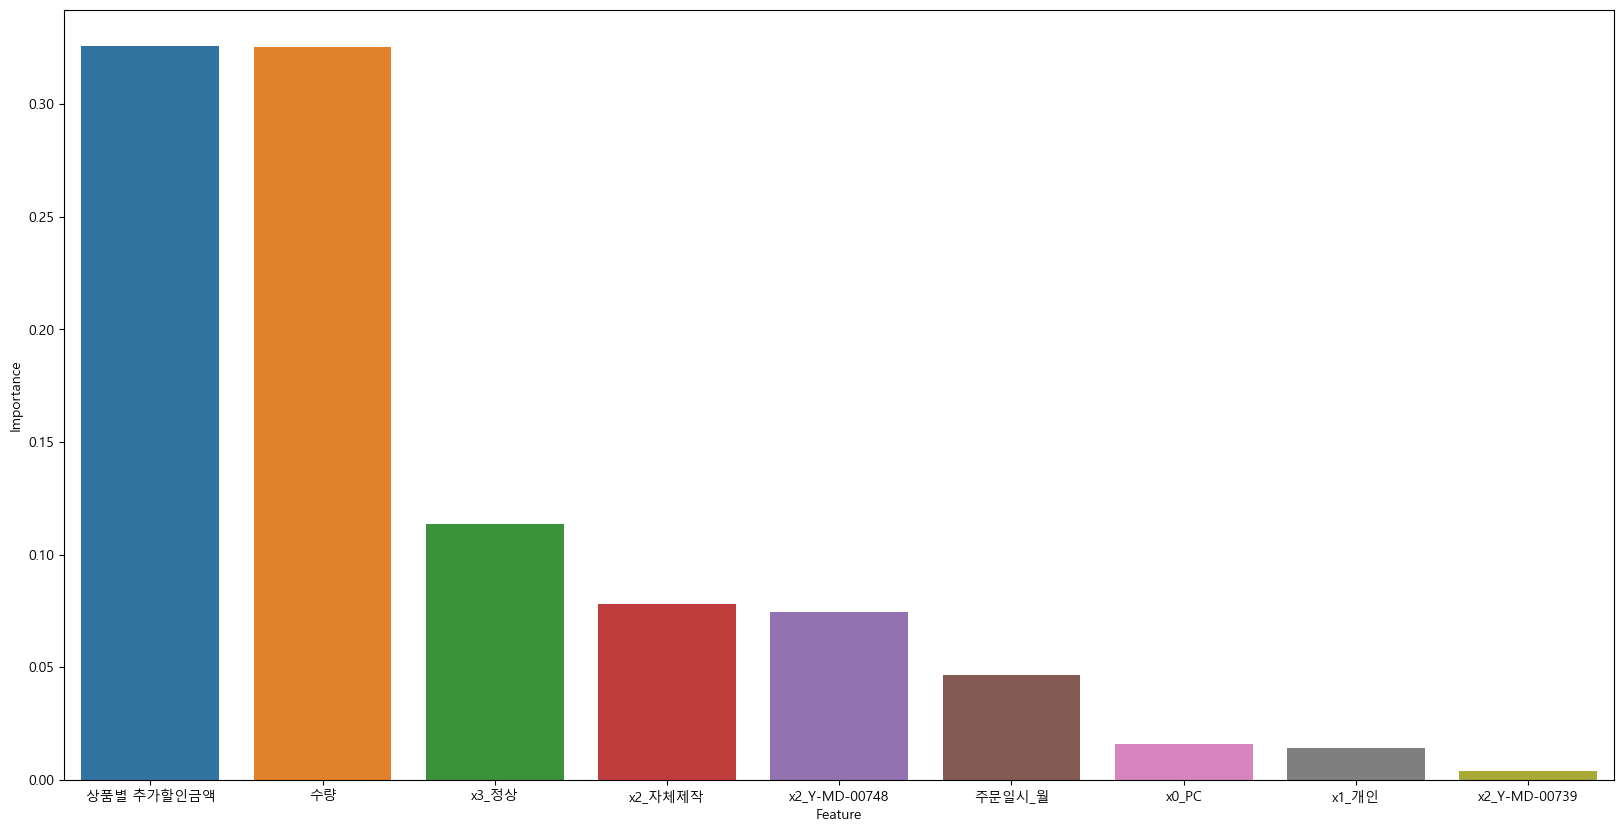

In [320]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_importance.iloc[[1, 0, 11, 10, 9, 2, 3, 5, 7]], x='Feature', y='Importance')
plt.show()

In [294]:
from xgboost import XGBClassifier

# model = XGBClassifier()
# model.fit(X, Y)

print(best_model['xgbregressor'].feature_importances_)
# plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
# plt.show()

[0.3255364  0.32556927 0.04642959 0.01573182 0.         0.01433153
 0.         0.00406915 0.00199081 0.07460447 0.07805225 0.11368467
 0.        ]


In [304]:
# # xgb 시각화
# from xgboost import plot_importance
# from xgboost import plot_tree
# import matplotlib.pyplot as plt
# %matplotlib inline

# fig, ax = plt.subplots(figsize=(12, 12))
# plot_importance(best_model, ax=ax)

## RandomForestRegressor

In [260]:
# 4. 파이프라인을 구성한다.
numeric_pipe = make_pipeline(KNNImputer(), MinMaxScaler())
category_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())
numeric_list = X.describe().columns.tolist()
category_list = X.describe(include='object').columns.tolist()
preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list)
                                            , (category_pipe, category_list))
model_pipe = make_pipeline(preprocessing_pipe, RandomForestRegressor())
# 5. 교차검증 및 하이퍼 파라미터 튜닝
hyperparameter_list = {'randomforestregressor__max_depth':range(5,11)
                        , 'randomforestregressor__min_samples_leaf':range(5,11)
                        , 'randomforestregressor__min_samples_split':range(5,11)}
grid_model = GridSearchCV(model_pipe, param_grid={}
                            , cv=5, n_jobs=-1, scoring='f1')
grid_model.fit(X_train, Y_train)

# 6. 평가
best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

print(f'Y_train_pred : {Y_train_pred}\n')
print(f'Y_test_pred : {Y_test_pred}\n')
# 평가
print(f'r2_score_train : {r2_score(Y_train, Y_train_pred)}\n')
print(f'r2_score_test : {r2_score(Y_test, Y_test_pred)}\n')

encoder_list = best_model.named_steps['columntransformer'].transformers_[1][1].named_steps['onehotencoder'].get_feature_names().tolist()
df_importance = pd.DataFrame()
df_importance['Feature'] = pd.Series(numeric_list + encoder_list)


df_importance['Importance']= best_model['randomforestregressor'].feature_importances_
df_importance.sort_values(by='Importance', ascending=False)

c:\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Y_train_pred : [76297.86666667 67890.93890005 10422.         ... 67001.6946583
 14615.         63470.        ]

Y_test_pred : [64889.37301567 21729.43333333 52279.81020924 ... 52320.57522979
 59823.84942112 51587.66130311]

r2_score_train : 0.6182747347261678

r2_score_test : 0.5560367617353946



c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Feature,Importance
1,상품별 추가할인금액,0.725213
0,수량,0.187887
2,주문일시_월,0.055094
4,x0_모바일,0.005405
5,x1_개인,0.005306
6,x1_사업자,0.005302
3,x0_PC,0.005138
12,x3_품절,0.004216
11,x3_정상,0.003472
10,x2_자체제작,0.001580


## 모델 평가

In [261]:
# 6. 평가
best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

# 평가
print(r2_score(Y_train, Y_train_pred))
print(r2_score(Y_test, Y_test_pred))

0.6182747347261678
0.5560367617353946


In [262]:
encoder_list = best_model.named_steps['columntransformer'].transformers_[1][1].named_steps['onehotencoder'].get_feature_names().tolist()
df_importance = pd.DataFrame()
df_importance['Feature'] = pd.Series(numeric_list + encoder_list)

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Classifier

In [263]:
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree   import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [264]:
def func6(data) : 
    if data < 100000 :
        return '1만원대'
    else : 
        return '10만원대'

df3_m['가격대'] = df3_m['판매가_x'].apply(func6)

C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_3504\1441946627.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_m['가격대'] = df3_m['판매가_x'].apply(func6)


In [265]:
df3_m.columns

Index(['ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일', '유입경로',
       '유입기기', '회원 가입일', '사업자구분', '회원구분', '결제수단', '공급원가', '교환구분', '네이버 포인트',
       '배송번호', '배송비 정보', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액', '상품명', '상품번호',
       '상품별 추가할인금액', '수량', '수령인 주소', '주문 시 회원등급', '주문경로', '주문번호', '주문일시',
       '카드사', '쿠폰 할인금액', '판매가_x', '품목번호', '#', '공급사', '과세/면세', '담기', '매입가',
       '상품명(기본)', '상품코드', '재입고알림', '제조사', '카테고리', '판매가_y', '품절여부', '후기', '연령대',
       '주문일시_dt', '주문일시_년', '주문일시_월', '주문일시_일', '주문일시_분기', '배송시작일_dt',
       '배송완료일_dt', '배송시간', '시도', '가격대'],
      dtype='object')

In [266]:
X = df3_m[['유입기기','수량','사업자구분','상품별 추가할인금액','제조사','주문일시_월','품절여부']]
Y = df3_m['가격대']

In [267]:
X = df3_m[['유입기기','수량','사업자구분','상품별 추가할인금액','제조사','주문일시_월','주문 시 회원등급','상품코드']]
Y = df3_m['가격대']

In [268]:


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1234)

numeric_pipe = make_pipeline(SimpleImputer(), StandardScaler())
category_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

numeric_list = X.describe().columns.tolist()
category_list = X.describe(include='object').columns.tolist()

preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list), (category_pipe, category_list))

## DecisionClassifier

In [269]:
# 모델 선언 예시
# model = XGBClassifier(n_estimators=500, learning_rate=0.2, max_depth=4, random_state = 32)


model_pipe = make_pipeline(preprocessing_pipe, DecisionTreeClassifier(criterion = "entropy", max_depth = 2))

hyperparameter_list = {'decisiontreeregressor__max_depth' : range(5,10),
                        'decisiontreeregressor__min_samples_split' : range(5,10),
                        'decisiontreeregressor__min_samples_leaf' : range(5,10)}

grid_model = GridSearchCV(model_pipe, cv=5, param_grid={}, n_jobs=-1)
grid_model.fit(X_train, Y_train)

# 6. 평가
best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

print(f'Y_train_pred : {Y_train_pred}\n')
print(f'Y_test_pred : {Y_test_pred}\n')
# 평가
print('학습능력평가')
print(classification_report(Y_train, Y_train_pred))
print('일반화능력평가')
print(classification_report(Y_test, Y_test_pred))


c:\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Y_train_pred : ['1만원대' '1만원대' '1만원대' ... '1만원대' '1만원대' '1만원대']

Y_test_pred : ['10만원대' '1만원대' '1만원대' ... '1만원대' '1만원대' '1만원대']

학습능력평가
              precision    recall  f1-score   support

       10만원대       0.79      0.49      0.61      1256
        1만원대       0.92      0.98      0.95      7983

    accuracy                           0.91      9239
   macro avg       0.86      0.74      0.78      9239
weighted avg       0.91      0.91      0.91      9239

일반화능력평가
              precision    recall  f1-score   support

       10만원대       0.76      0.52      0.62       396
        1만원대       0.93      0.98      0.95      2684

    accuracy                           0.92      3080
   macro avg       0.85      0.75      0.79      3080
weighted avg       0.91      0.92      0.91      3080



## RandomForestClassifier

In [270]:
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# 모델 선언 예시
# model = XGBClassifier(n_estimators=500, learning_rate=0.2, max_depth=4, random_state = 32)


model_pipe = make_pipeline(preprocessing_pipe, RandomForestClassifier())

hyperparameter_list = {}

grid_model = GridSearchCV(model_pipe, cv=5, param_grid={}, n_jobs=-1)
grid_model.fit(X_train, Y_train)

# 6. 평가
best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

print(f'Y_train_pred : {Y_train_pred}\n')
print(f'Y_test_pred : {Y_test_pred}\n')
# 평가
print('학습능력평가')
print(classification_report(Y_train, Y_train_pred))
print('일반화능력평가')
print(classification_report(Y_test, Y_test_pred))



c:\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Y_train_pred : ['1만원대' '1만원대' '1만원대' ... '1만원대' '1만원대' '1만원대']

Y_test_pred : ['10만원대' '1만원대' '1만원대' ... '1만원대' '1만원대' '1만원대']

학습능력평가
              precision    recall  f1-score   support

       10만원대       1.00      1.00      1.00      1256
        1만원대       1.00      1.00      1.00      7983

    accuracy                           1.00      9239
   macro avg       1.00      1.00      1.00      9239
weighted avg       1.00      1.00      1.00      9239

일반화능력평가
              precision    recall  f1-score   support

       10만원대       0.95      0.90      0.92       396
        1만원대       0.98      0.99      0.99      2684

    accuracy                           0.98      3080
   macro avg       0.97      0.94      0.96      3080
weighted avg       0.98      0.98      0.98      3080



## K-최근접

In [271]:
model_pipe = make_pipeline(preprocessing_pipe, KNeighborsClassifier(n_neighbors = 7))

hyperparameter_list = {}

grid_model = GridSearchCV(model_pipe, cv=5, param_grid={}, n_jobs=-1)
grid_model.fit(X_train, Y_train)

# 6. 평가
best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

print(f'Y_train_pred : {Y_train_pred}\n')
print(f'Y_test_pred : {Y_test_pred}\n')
# 평가
print('학습능력평가')
print(classification_report(Y_train, Y_train_pred))
print('일반화능력평가')
print(classification_report(Y_test, Y_test_pred))



c:\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Y_train_pred : ['1만원대' '1만원대' '1만원대' ... '1만원대' '1만원대' '1만원대']

Y_test_pred : ['1만원대' '1만원대' '1만원대' ... '1만원대' '1만원대' '1만원대']

학습능력평가
              precision    recall  f1-score   support

       10만원대       0.88      0.65      0.75      1256
        1만원대       0.95      0.99      0.97      7983

    accuracy                           0.94      9239
   macro avg       0.91      0.82      0.86      9239
weighted avg       0.94      0.94      0.94      9239

일반화능력평가
              precision    recall  f1-score   support

       10만원대       0.80      0.55      0.65       396
        1만원대       0.94      0.98      0.96      2684

    accuracy                           0.92      3080
   macro avg       0.87      0.77      0.81      3080
weighted avg       0.92      0.92      0.92      3080



# PSB

In [272]:
df3.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일', '유입경로',
       '유입기기', '회원 가입일', '사업자구분', '회원구분', '결제수단', '공급원가', '교환구분', '네이버 포인트',
       '배송번호', '배송비 정보', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액', '상품명', '상품번호',
       '상품별 추가할인금액', '수량', '수령인 주소', '주문 시 회원등급', '주문경로', '주문번호', '주문일시',
       '카드사', '쿠폰 할인금액', '판매가_x', '품목번호', '#', '공급사', '과세/면세', '담기', '매입가',
       '상품명(기본)', '상품코드', '재입고알림', '제조사', '카테고리', '판매가_y', '품절여부', '후기', '연령대',
       '주문일시_dt', '주문일시_년', '주문일시_월', '주문일시_일', '주문일시_분기', '배송시작일_dt',
       '배송완료일_dt', '배송시간', '시도', '가격대'],
      dtype='object')>

<AxesSubplot:xlabel='연령대', ylabel='Count'>

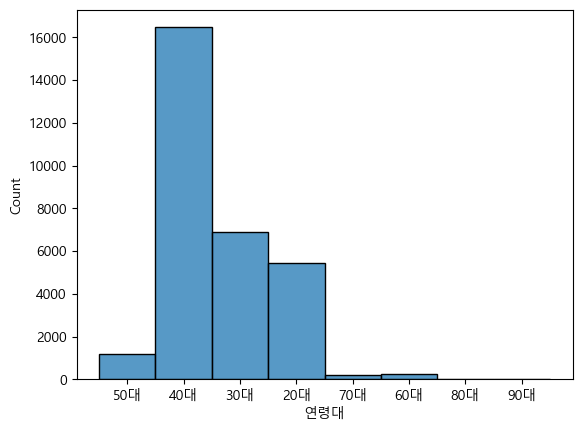

In [273]:
sns.histplot(df3, x='연령대')

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='판매가_x', ylabel='Density'>

c:\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


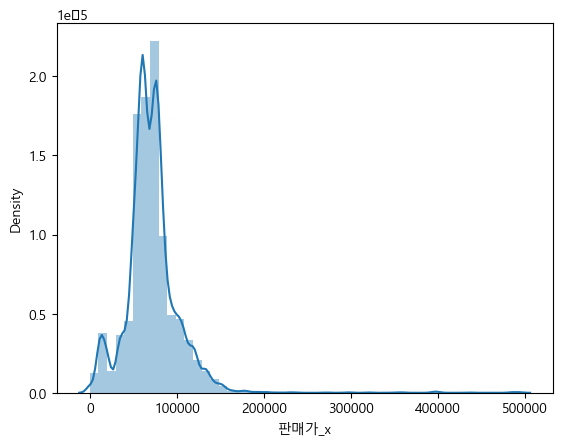

In [274]:
sns.distplot(df3['판매가_x'])

In [275]:
df3_p_x = df3.pivot_table(index='사업자구분', values='판매가_x').reset_index()
df3_p_x

,사업자구분,판매가_x
0,개인,71209.519718
1,사업자,71037.262073
2,외국인,53900.000000


<AxesSubplot:xlabel='사업자구분', ylabel='판매가_x'>

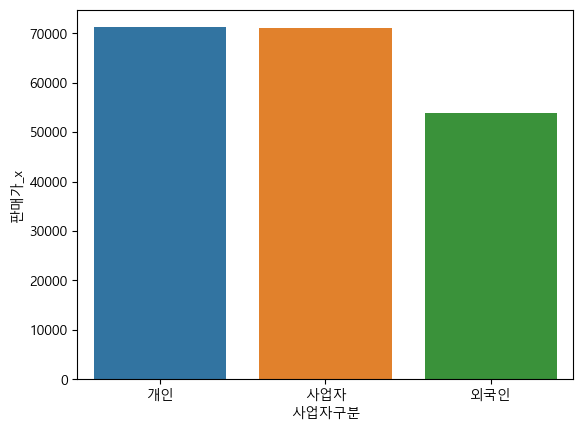

In [276]:
sns.barplot(data=df3_p_x, x='사업자구분', y='판매가_x')

<AxesSubplot:xlabel='주문일시_년', ylabel='count'>

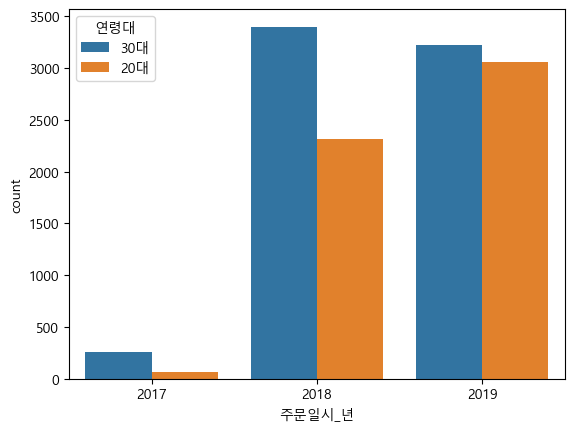

In [277]:
sns.countplot(data = df3_m, x='주문일시_년', hue='연령대')

In [278]:
df3['배송시간'].value_counts()

4 days     29910
6 days       413
0 days        33
2 days        26
1 days        12
8 days        11
7 days        11
5 days        10
3 days         6
24 days        3
9 days         3
10 days        2
12 days        2
15 days        1
Name: 배송시간, dtype: int64

In [279]:
df3_c = df3[['나이', '사용가능 적립금', '성별', '최종주문일', '유입경로', '유입기기', '사업자구분', '회원구분', '결제수단', '교환구분', '배송비 정보', '사용한 적립금액', '상품구매금액', '상품번호', '상품별 추가할인금액', '수량', '주문 시 회원등급', '주문경로', '카드사', '쿠폰 할인금액', '판매가_x', '공급사', '과세/면세', '상품명(기본)', '재입고알림', '제조사', '카테고리', '품절여부', '후기', '연령대', '시도', '주문일시_dt', '배송시간']]

In [280]:
df3.corr()

,나이,사용가능 적립금,공급원가,네이버 포인트,사용한 적립금액,상품구매금액,상품번호,상품별 추가할인금액,수량,쿠폰 할인금액,판매가_x,품목번호,#,담기,매입가,상품코드,판매가_y,후기,주문일시_년,주문일시_월,주문일시_일,주문일시_분기
나이,1.000000,-0.006277,0.036779,NaN,0.057030,0.065242,-0.043025,0.070744,0.041795,0.044487,0.043877,-0.121563,0.044256,-0.051696,0.033161,-0.043025,0.034749,-0.052556,-0.105937,0.016452,-0.011322,0.015708
사용가능 적립금,-0.006277,1.000000,0.039945,NaN,0.042835,0.094429,0.059079,0.056380,0.081467,0.066987,0.042973,0.031511,-0.062290,0.055349,0.037705,0.059079,0.042605,0.042291,0.039019,-0.021476,-0.000012,-0.024050
공급원가,0.036779,0.039945,1.000000,NaN,0.002928,0.531405,-0.186826,0.261154,-0.091180,0.001461,0.947346,-0.036290,0.216417,-0.161295,0.971371,-0.186826,0.974867,-0.066890,-0.032493,0.023676,0.003421,0.023039
네이버 포인트,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
사용한 적립금액,0.057030,0.042835,0.002928,NaN,1.000000,0.062543,0.029110,0.030452,0.067805,-0.028631,0.005689,0.028316,-0.032628,0.035647,0.005430,0.029110,0.006876,0.021624,0.021640,-0.002402,-0.004129,-0.007202
상품구매금액,0.065242,0.094429,0.531405,NaN,0.062543,1.000000,-0.072301,0.667072,0.704576,0.017153,0.565426,-0.076361,0.077112,-0.000609,0.516279,-0.072301,0.527813,0.035761,-0.067451,0.061802,-0.008227,0.068294
상품번호,-0.043025,0.059079,-0.186826,NaN,0.029110,-0.072301,1.000000,-0.062479,0.070127,0.019368,-0.176448,0.339492,-0.981217,0.327928,-0.149041,1.000000,-0.134807,-0.033812,0.315117,-0.102006,-0.009086,-0.102932
상품별 추가할인금액,0.070744,0.056380,0.261154,NaN,0.030452,0.667072,-0.062479,1.000000,0.440826,0.016723,0.417300,-0.409474,0.067354,0.018228,0.257892,-0.062479,0.258563,0.045732,-0.356282,0.279067,-0.033386,0.306620
수량,0.041795,0.081467,-0.091180,NaN,0.067805,0.704576,0.070127,0.440826,1.000000,0.015632,-0.089573,0.029214,-0.088507,0.113979,-0.086517,0.070127,-0.078196,0.088101,0.023414,-0.005542,-0.015771,0.000100
쿠폰 할인금액,0.044487,0.066987,0.001461,NaN,-0.028631,0.017153,0.019368,0.016723,0.015632,1.000000,0.005625,-0.041973,-0.023511,0.003971,0.001455,0.019368,0.001503,-0.005150,-0.034391,-0.007396,0.007522,-0.006920


In [281]:
df3_c.columns

Index(['나이', '사용가능 적립금', '성별', '최종주문일', '유입경로', '유입기기', '사업자구분', '회원구분',
       '결제수단', '교환구분', '배송비 정보', '사용한 적립금액', '상품구매금액', '상품번호', '상품별 추가할인금액',
       '수량', '주문 시 회원등급', '주문경로', '카드사', '쿠폰 할인금액', '판매가_x', '공급사', '과세/면세',
       '상품명(기본)', '재입고알림', '제조사', '카테고리', '품절여부', '후기', '연령대', '시도', '주문일시_dt',
       '배송시간'],
      dtype='object')

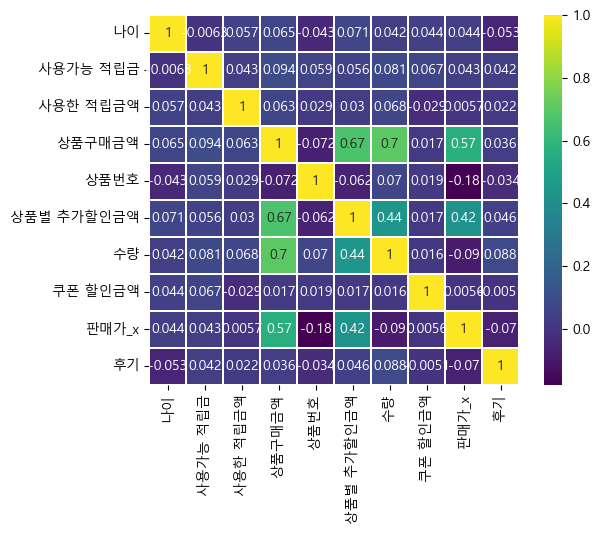

<Figure size 1500x800 with 0 Axes>

In [282]:
sns.heatmap(df3_c.corr(), square=True, annot=True, cmap=plt.cm.viridis, linewidths=0.01, linecolor='white')
plt.figure(figsize=(10,10))
plt.gcf().set_size_inches(15, 8)
plt.show()

## RFM분석

In [321]:
df3.columns

Index(['ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일', '유입경로',
       '유입기기', '회원 가입일', '사업자구분', '회원구분', '결제수단', '공급원가', '교환구분', '네이버 포인트',
       '배송번호', '배송비 정보', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액', '상품명', '상품번호',
       '상품별 추가할인금액', '수량', '수령인 주소', '주문 시 회원등급', '주문경로', '주문번호', '주문일시',
       '카드사', '쿠폰 할인금액', '판매가_x', '품목번호', '#', '공급사', '과세/면세', '담기', '매입가',
       '상품명(기본)', '상품코드', '재입고알림', '제조사', '카테고리', '판매가_y', '품절여부', '후기', '연령대',
       '주문일시_dt', '주문일시_년', '주문일시_월', '주문일시_일', '주문일시_분기', '배송시작일_dt',
       '배송완료일_dt', '배송시간', '시도', '가격대'],
      dtype='object')

In [349]:
df3_sum = df3.pivot_table(index='ID', values='판매가_x', aggfunc='sum').reset_index()

In [350]:
df3_count = df3.pivot_table(index='ID', values='판매가_x', aggfunc='count').reset_index()

In [351]:
df3_rf = pd.merge(df3_sum, df3_count, on='ID', how='inner')

In [352]:
df3_rf.columns

Index(['ID', '판매가_x_x', '판매가_x_y'], dtype='object')

In [353]:
df3_rf['판매가_x_x'].sum()

2165256590

In [354]:
df3_rf['m'] = 2165256590

In [355]:
df3_rf['m2'] = df3_rf['판매가_x_x']/df3_rf['m']

In [356]:
df3_rf

,ID,판매가_x_x,판매가_x_y,m,m2
0,1003409866@k,2281740,35,2165256590,0.001054
1,100381931@n,41730,3,2165256590,0.000019
2,1004498382@k,76400,1,2165256590,0.000035
3,1004547839@k,180400,2,2165256590,0.000083
4,1004714862@k,108110,2,2165256590,0.000050
...,...,...,...,...,...
4615,zxvnm07,94380,1,2165256590,0.000044
4616,zxxz60,472520,8,2165256590,0.000218
4617,zzar2000,1347600,22,2165256590,0.000622
4618,zzbbwmf,166140,3,2165256590,0.000077


In [357]:
df3_rf.columns

Index(['ID', '판매가_x_x', '판매가_x_y', 'm', 'm2'], dtype='object')

In [358]:
df3_rf.rename(columns = {'판매가_x_x':'R', '판매가_x_y' : 'F', 'm2' : 'M'},inplace=True)

In [361]:
df3_rfm = df3_rf[['ID', 'R', 'F', 'M']]

In [362]:
df3_rfm

,ID,R,F,M
0,1003409866@k,2281740,35,0.001054
1,100381931@n,41730,3,0.000019
2,1004498382@k,76400,1,0.000035
3,1004547839@k,180400,2,0.000083
4,1004714862@k,108110,2,0.000050
...,...,...,...,...
4615,zxvnm07,94380,1,0.000044
4616,zxxz60,472520,8,0.000218
4617,zzar2000,1347600,22,0.000622
4618,zzbbwmf,166140,3,0.000077


In [363]:
df3_rfm.sort_values(by='M',ascending=False)

,ID,R,F,M
2131,mission1013,16657720,205,0.007693
662,776646558@k,15786750,194,0.007291
1117,cmp1220,12685920,163,0.005859
915,as12,9703390,133,0.004481
4477,wndjdqkqh,8945260,135,0.004131
...,...,...,...,...
2927,pp1472,9190,1,0.000004
648,760746334@k,9000,1,0.000004
3057,pp1600,8440,1,0.000004
3214,pp201,0,1,0.000000
